# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 35000
numberDeaths = 15000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '200days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31       0.0000     0.0000   
1          AFG      Asia    Afghanistan 2020-01-01       0.0000     0.0000   
2          AFG      Asia    Afghanistan 2020-01-02       0.0000     0.0000   
3          AFG      Asia    Afghanistan 2020-01-03       0.0000     0.0000   
4          AFG      Asia    Afghanistan 2020-01-04       0.0000     0.0000   
...        ...       ...            ...        ...          ...        ...   
36132      NaN       NaN  International 2020-02-28     705.0000     0.0000   
36133      NaN       NaN  International 2020-02-29     705.0000     0.0000   
36134      NaN       NaN  International 2020-03-01     705.0000     0.0000   
36135      NaN       NaN  International 2020-03-02     705.0000     0.0000   
36136      NaN       NaN  International 2020-03-10     696.0000    -9.0000   

       total_deaths  new_deaths  total_cases_per_million  \
0            0.0000      0.0000                   0.0000   
1            0.0000      0.0000                   0.0000   
2            0.0000      0.0000                   0.0000   
3            0.0000      0.0000                   0.0000   
4            0.0000      0.0000                   0.0000   
...             ...         ...                      ...   
36132        4.0000      0.0000                      nan   
36133        6.0000      2.0000                      nan   
36134        6.0000      0.0000                      nan   
36135        6.0000      0.0000                      nan   
36136        7.0000      1.0000                      nan   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                     0.0000  ...         1.3370       1803.9870   
1                     0.0000  ...         1.3370       1803.9870   
2                     0.0000  ...         1.3370       1803.9870   
3                     0.0000  ...         1.3370       1803.9870   
4                     0.0000  ...         1.3370       1803.9870   
...                      ...  ...            ...             ...   
36132                    nan  ...            nan             nan   
36133                    nan  ...            nan             nan   
36134                    nan  ...            nan             nan   
36135                    nan  ...            nan             nan   
36136                    nan  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan               597.0290               9.5900   
1                  nan               597.0290               9.5900   
2                  nan               597.0290               9.5900   
3                  nan               597.0290               9.5900   
4                  nan               597.0290               9.5900   
...                ...                    ...                  ...   
36132              nan                    nan                  nan   
36133              nan                    nan                  nan   
36134              nan                    nan                  nan   
36135              nan                    nan                  nan   
36136              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                 37.7460   
1                 nan           nan                 37.7460   
2                 nan           nan                 37.7460   
3                 nan           nan                 37.7460   
4                 nan           nan                 37.7460   
...               ...           ...                     ...   
36132             nan           nan                     nan   
36133             nan           nan                     nan   
36134             nan           nan                     nan   
36135             nan           nan                     nan 

In [10]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [11]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
25    2020-01-25           Afghanistan       0.0000        0.0000     0.0000   
31467 2020-02-13           Switzerland       0.0000        0.0000     0.0000   
31468 2020-02-14           Switzerland       0.0000        0.0000     0.0000   
31469 2020-02-15           Switzerland       0.0000        0.0000     0.0000   
31470 2020-02-16           Switzerland       0.0000        0.0000     0.0000   
...          ...                   ...          ...           ...        ...   
33762 2020-03-14  United Arab Emirates          nan           nan        nan   
35164 2020-03-03               Vietnam          nan           nan        nan   
35165 2020-03-04               Vietnam          nan           nan        nan   
35166 2020-03-05               Vietnam          nan           nan        nan   
35167 2020-03-06               Vietnam          nan           nan        nan   

       new_deaths  
25         0.0000  
31467      0.0000  
31468      0.0000  
31469      0.0000  
31470      0.0000  
...           ...  
33762         nan  
35164         nan  
35165         nan  
35166         nan  
35167         nan  

[34437 rows x 6 columns]

# Number of cases and deaths in World

In [12]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-01-25     1350.0000       41.0000    453.0000     15.0000
1   2020-01-26     2023.0000       56.0000    673.0000     15.0000
2   2020-01-27     2820.0000       81.0000    797.0000     25.0000
3   2020-01-28     4587.0000      106.0000   1767.0000     25.0000
4   2020-01-29     6067.0000      132.0000   1480.0000     26.0000
..         ...           ...           ...         ...         ...
195 2020-08-07 19083836.0000   714623.0000 284710.0000   6911.0000
196 2020-08-08 19358649.0000   721172.0000 274813.0000   6549.0000
197 2020-08-09 19625682.0000   726842.0000 267033.0000   5670.0000
198 2020-08-10 19854874.0000   731330.0000 229192.0000   4488.0000
199 2020-08-11 20075600.0000   736372.0000 220726.0000   5042.0000

[200 rows x 5 columns]

In [13]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))

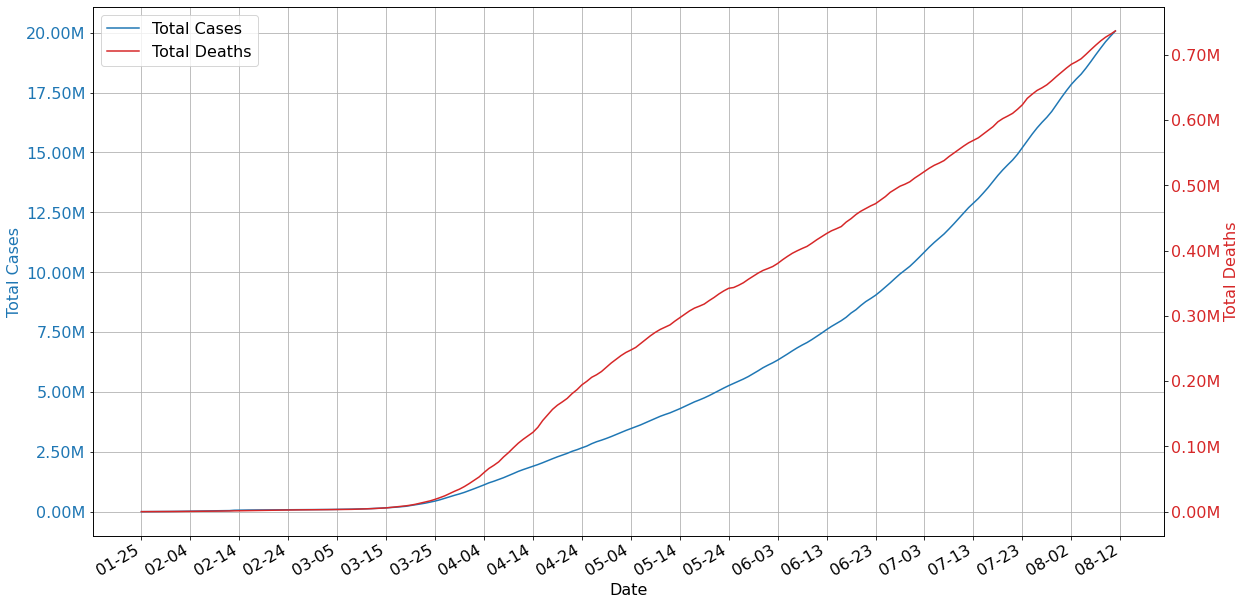

In [14]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

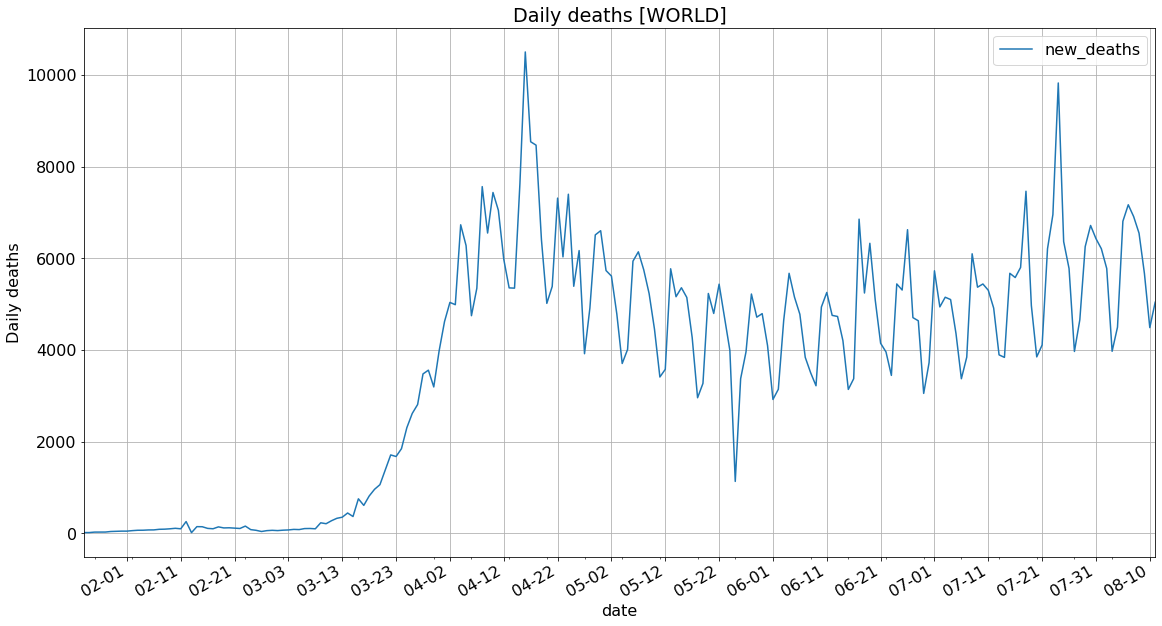

In [15]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [16]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='Daily Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%m-%d',
                       title='Daily Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### Daily cases [WORLD]

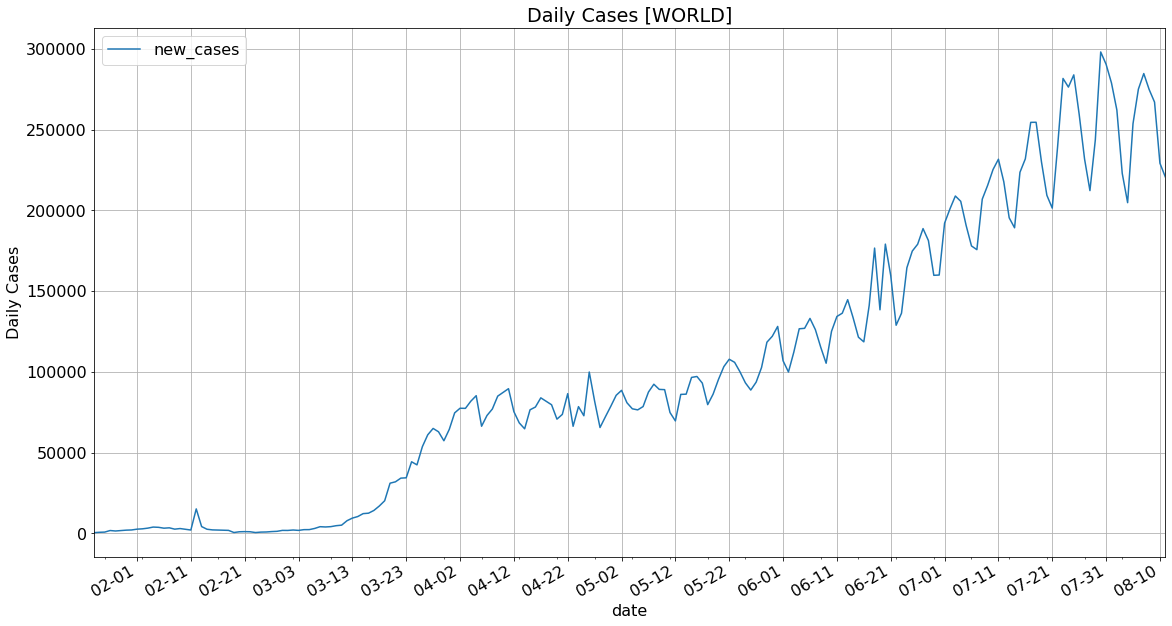

In [17]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [18]:
mainCountries = df[
        (df['total_cases'] >= numberCases) & 
        (df['total_deaths'] >= numberDeaths) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries = mainCountries.dropna()
mainCountries

date        location  total_cases  total_deaths  new_cases  \
34362 2020-08-11   United_States 5094394.0000   163461.0000 49530.0000   
34361 2020-08-10   United_States 5044864.0000   162938.0000 46847.0000   
34360 2020-08-09   United_States 4998017.0000   162425.0000 56221.0000   
34359 2020-08-08   United_States 4941796.0000   161356.0000 58150.0000   
34358 2020-08-07   United_States 4883646.0000   160104.0000 59755.0000   
...          ...             ...          ...           ...        ...   
11747 2020-04-18          France  109252.0000    18681.0000   405.0000   
11746 2020-04-17          France  108847.0000    17920.0000  2641.0000   
34021 2020-04-17  United_Kingdom  106443.0000    15956.0000  5065.0000   
11745 2020-04-16          France  106206.0000    17167.0000  2633.0000   
11744 2020-04-15          France  103573.0000    15729.0000  5497.0000   

       new_deaths  
34362    523.0000  
34361    513.0000  
34360   1069.0000  
34359   1252.0000  
34358   1848.0000  
...           ...  
11747    761.0000  
11746    753.0000  
34021   1029.0000  
11745   1438.0000  
11744    762.0000  

[847 rows x 6 columns]

In [19]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'India', 'Russia', 'Mexico', 'Peru',
       'Iran', 'Spain', 'United_Kingdom', 'Italy', 'France'], dtype=object)

In [20]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [53]:
d[1]

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-02-10   Brazil       0.0000        0.0000     0.0000      0.0000
1   2020-02-11   Brazil       0.0000        0.0000     0.0000      0.0000
2   2020-02-12   Brazil       0.0000        0.0000     0.0000      0.0000
3   2020-02-13   Brazil       0.0000        0.0000     0.0000      0.0000
4   2020-02-14   Brazil       0.0000        0.0000     0.0000      0.0000
..         ...      ...          ...           ...        ...         ...
195 2020-08-07   Brazil 2912212.0000    98493.0000 53139.0000   1237.0000
196 2020-08-08   Brazil 2962442.0000    99572.0000 50230.0000   1079.0000
197 2020-08-09   Brazil 3012412.0000   100477.0000 49970.0000    905.0000
198 2020-08-10   Brazil 3035422.0000   101049.0000 23010.0000    572.0000
199 2020-08-11   Brazil 3057470.0000   101752.0000 22048.0000    703.0000

[200 rows x 6 columns]

In [21]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [22]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', timestamps)
dfTotalDeaths.insert(0, 'date', timestamps)
dfNewCases.insert(0, 'date', timestamps)
dfNewDeaths.insert(0, 'date', timestamps)

## <ins>Total cases</ins> in the most affected countries

In [23]:
dfTotalCases.sort_values(by=['date'], ascending=True)

date  United_States       Brazil        India      Russia  Mexico  \
0   2020-01-25         2.0000       0.0000       0.0000      0.0000  0.0000   
1   2020-01-26         2.0000       0.0000       0.0000      0.0000  0.0000   
2   2020-01-27         5.0000       0.0000       0.0000      0.0000  0.0000   
3   2020-01-28         5.0000       0.0000       0.0000      0.0000  0.0000   
4   2020-01-29         5.0000       0.0000       0.0000      0.0000  0.0000   
..         ...            ...          ...          ...         ...     ...   
195 2020-08-07   4883646.0000 2912212.0000 2088611.0000 871894.0000     nan   
196 2020-08-08   4941796.0000 2962442.0000 2153010.0000 877135.0000     nan   
197 2020-08-09   4998017.0000 3012412.0000 2215074.0000 882347.0000     nan   
198 2020-08-10   5044864.0000 3035422.0000 2268675.0000 887536.0000     nan   
199 2020-08-11   5094394.0000 3057470.0000          nan 897599.0000     nan   

       Peru        Iran       Spain  United_Kingdom       Italy      France  
0    1.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
1    7.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
2    9.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
3   11.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
4   17.0000      0.0000      0.0000          0.0000      0.0000      4.0000  
..      ...         ...         ...             ...         ...         ...  
195     nan 320117.0000 314362.0000     308134.0000 249204.0000 195633.0000  
196     nan 322567.0000 314362.0000     309005.0000 249756.0000 197921.0000  
197     nan 324692.0000 314362.0000     309763.0000 250103.0000 197921.0000  
198     nan 326712.0000 322980.0000     310825.0000 250566.0000 197921.0000  
199     nan 328844.0000         nan     311641.0000 250825.0000 202775.0000  

[200 rows x 12 columns]

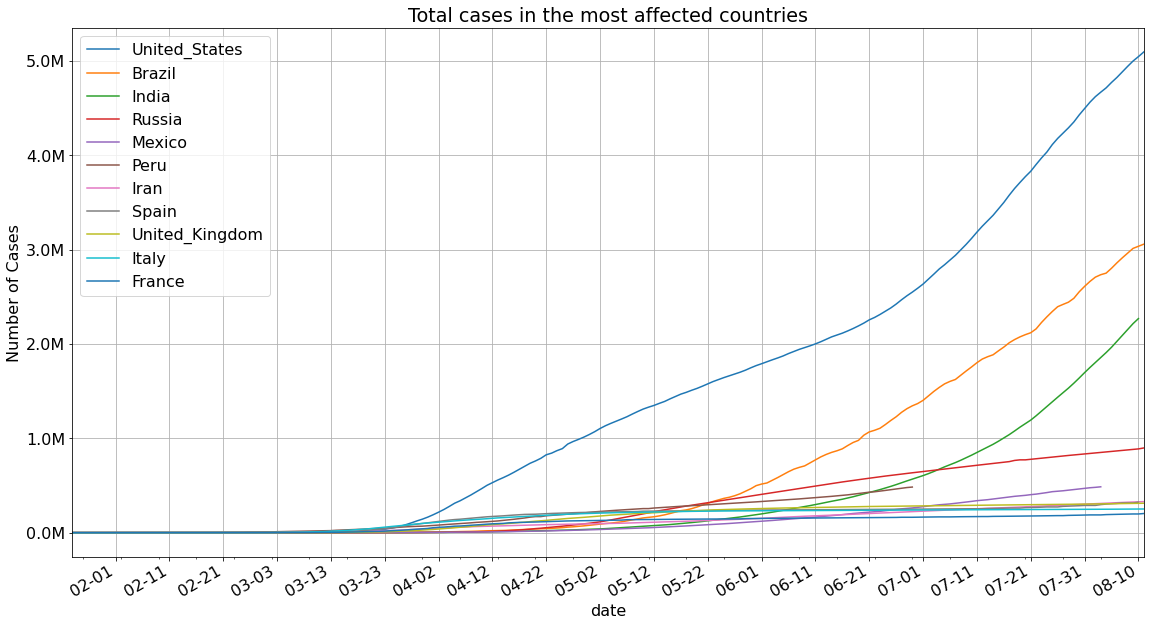

In [24]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

plt.grid()
plt.show()

## Log analysis - log<sub>b</sub><sup>x</sup>

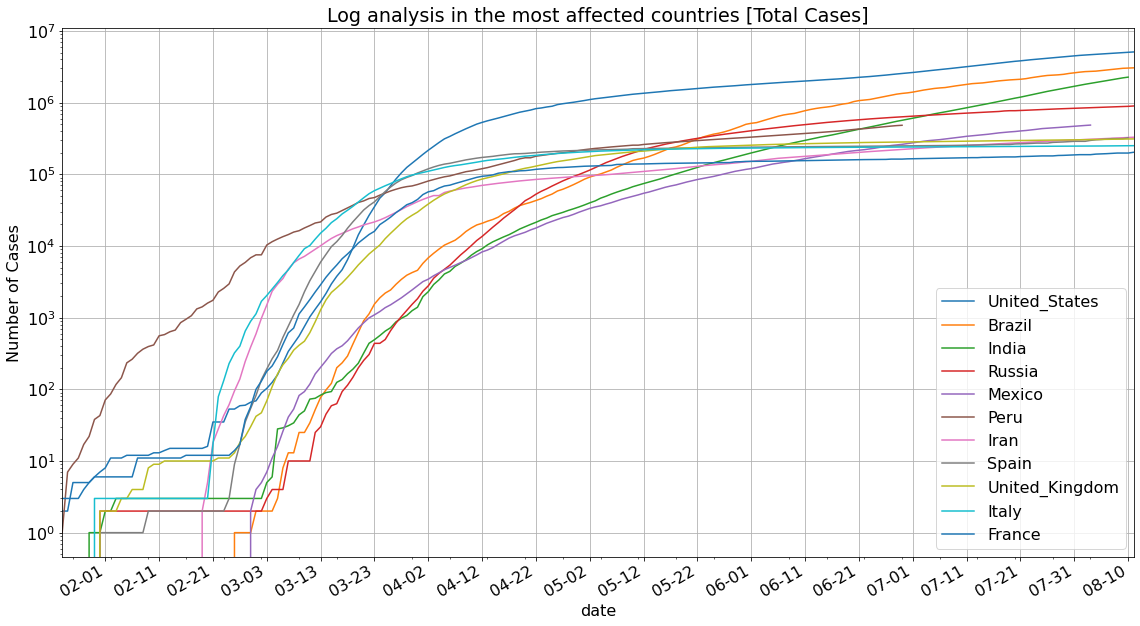

In [25]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log analysis in the most affected countries [Total Cases]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## <ins>Total Deaths</ins> in the most affected countries

In [26]:
dfTotalDeaths.sort_values(by=['date'], ascending=True)

date  United_States      Brazil      India     Russia  Mexico  \
0   2020-01-25         0.0000      0.0000     0.0000     0.0000  0.0000   
1   2020-01-26         0.0000      0.0000     0.0000     0.0000  0.0000   
2   2020-01-27         0.0000      0.0000     0.0000     0.0000  0.0000   
3   2020-01-28         0.0000      0.0000     0.0000     0.0000  0.0000   
4   2020-01-29         0.0000      0.0000     0.0000     0.0000  0.0000   
..         ...            ...         ...        ...        ...     ...   
195 2020-08-07    160104.0000  98493.0000 42518.0000 14606.0000     nan   
196 2020-08-08    161356.0000  99572.0000 43379.0000 14725.0000     nan   
197 2020-08-09    162425.0000 100477.0000 44386.0000 14854.0000     nan   
198 2020-08-10    162938.0000 101049.0000 45257.0000 14931.0000     nan   
199 2020-08-11    163461.0000 101752.0000        nan 15131.0000     nan   

      Peru       Iran      Spain  United_Kingdom      Italy     France  
0   0.0000     0.0000     0.0000          0.0000     0.0000     0.0000  
1   0.0000     0.0000     0.0000          0.0000     0.0000     0.0000  
2   0.0000     0.0000     0.0000          0.0000     0.0000     0.0000  
3   0.0000     0.0000     0.0000          0.0000     0.0000     0.0000  
4   0.0000     0.0000     0.0000          0.0000     0.0000     0.0000  
..     ...        ...        ...             ...        ...        ...  
195    nan 17816.0000 28503.0000      46413.0000 35187.0000 30312.0000  
196    nan 18132.0000 28503.0000      46511.0000 35190.0000 30324.0000  
197    nan 18264.0000 28503.0000      46566.0000 35203.0000 30324.0000  
198    nan 18427.0000 28576.0000      46574.0000 35205.0000 30324.0000  
199    nan 18616.0000        nan      46526.0000 35209.0000 30340.0000  

[200 rows x 12 columns]

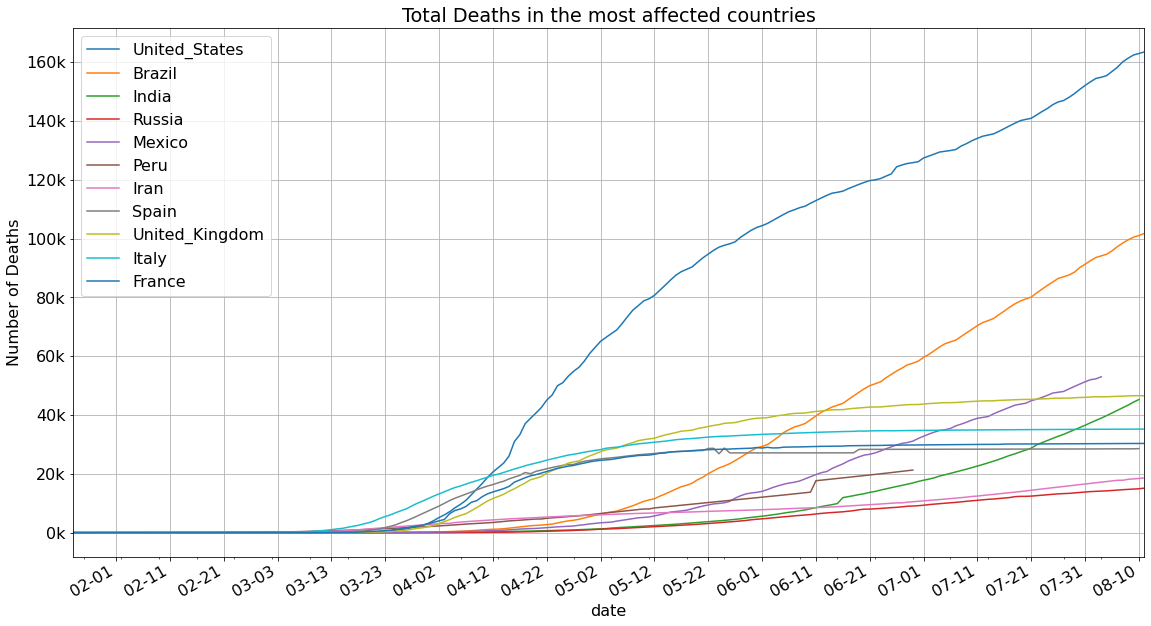

In [27]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

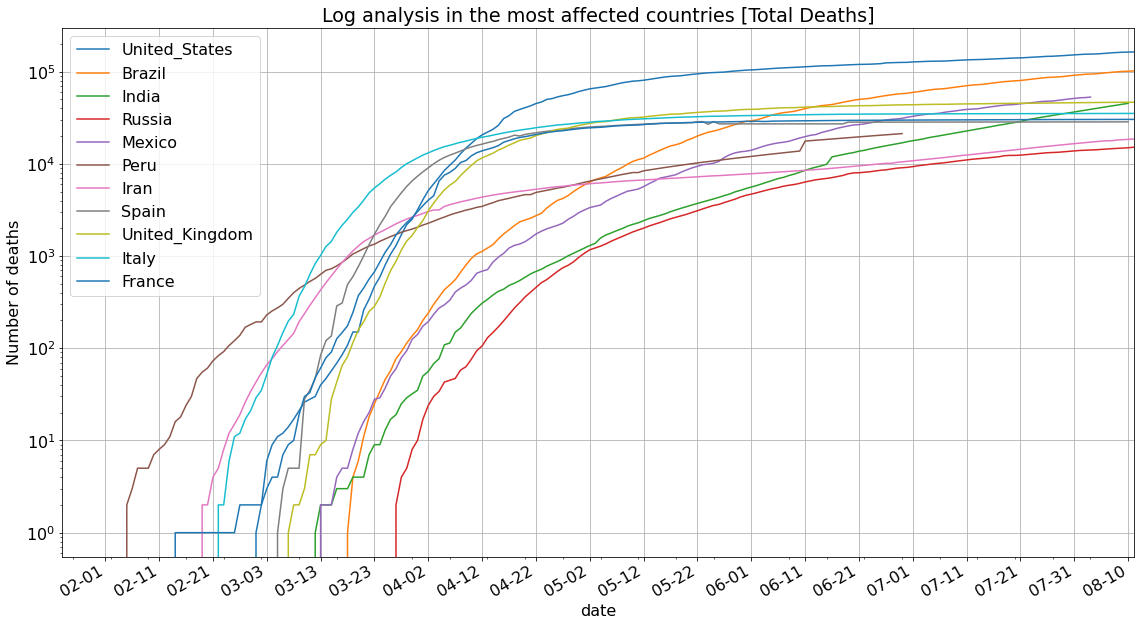

In [28]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log analysis in the most affected countries [Total Deaths]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

In [29]:
dfTotalCases

date  United_States       Brazil        India      Russia  Mexico  \
0   2020-01-25         2.0000       0.0000       0.0000      0.0000  0.0000   
1   2020-01-26         2.0000       0.0000       0.0000      0.0000  0.0000   
2   2020-01-27         5.0000       0.0000       0.0000      0.0000  0.0000   
3   2020-01-28         5.0000       0.0000       0.0000      0.0000  0.0000   
4   2020-01-29         5.0000       0.0000       0.0000      0.0000  0.0000   
..         ...            ...          ...          ...         ...     ...   
195 2020-08-07   4883646.0000 2912212.0000 2088611.0000 871894.0000     nan   
196 2020-08-08   4941796.0000 2962442.0000 2153010.0000 877135.0000     nan   
197 2020-08-09   4998017.0000 3012412.0000 2215074.0000 882347.0000     nan   
198 2020-08-10   5044864.0000 3035422.0000 2268675.0000 887536.0000     nan   
199 2020-08-11   5094394.0000 3057470.0000          nan 897599.0000     nan   

       Peru        Iran       Spain  United_Kingdom       Italy      France  
0    1.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
1    7.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
2    9.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
3   11.0000      0.0000      0.0000          0.0000      0.0000      3.0000  
4   17.0000      0.0000      0.0000          0.0000      0.0000      4.0000  
..      ...         ...         ...             ...         ...         ...  
195     nan 320117.0000 314362.0000     308134.0000 249204.0000 195633.0000  
196     nan 322567.0000 314362.0000     309005.0000 249756.0000 197921.0000  
197     nan 324692.0000 314362.0000     309763.0000 250103.0000 197921.0000  
198     nan 326712.0000 322980.0000     310825.0000 250566.0000 197921.0000  
199     nan 328844.0000         nan     311641.0000 250825.0000 202775.0000  

[200 rows x 12 columns]

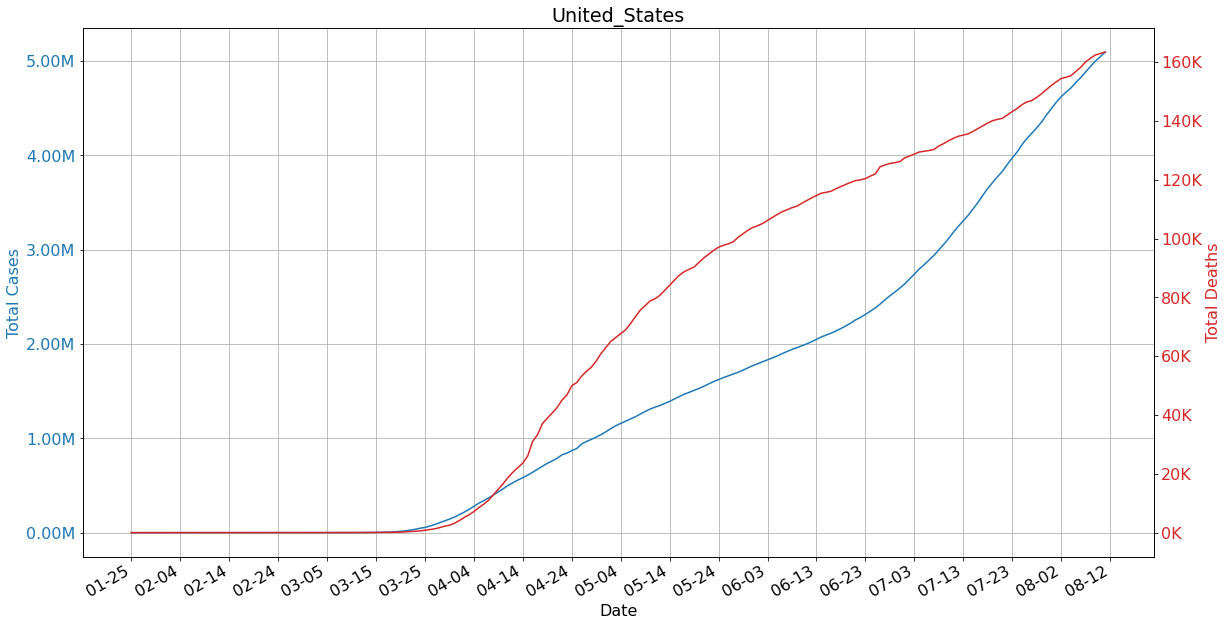

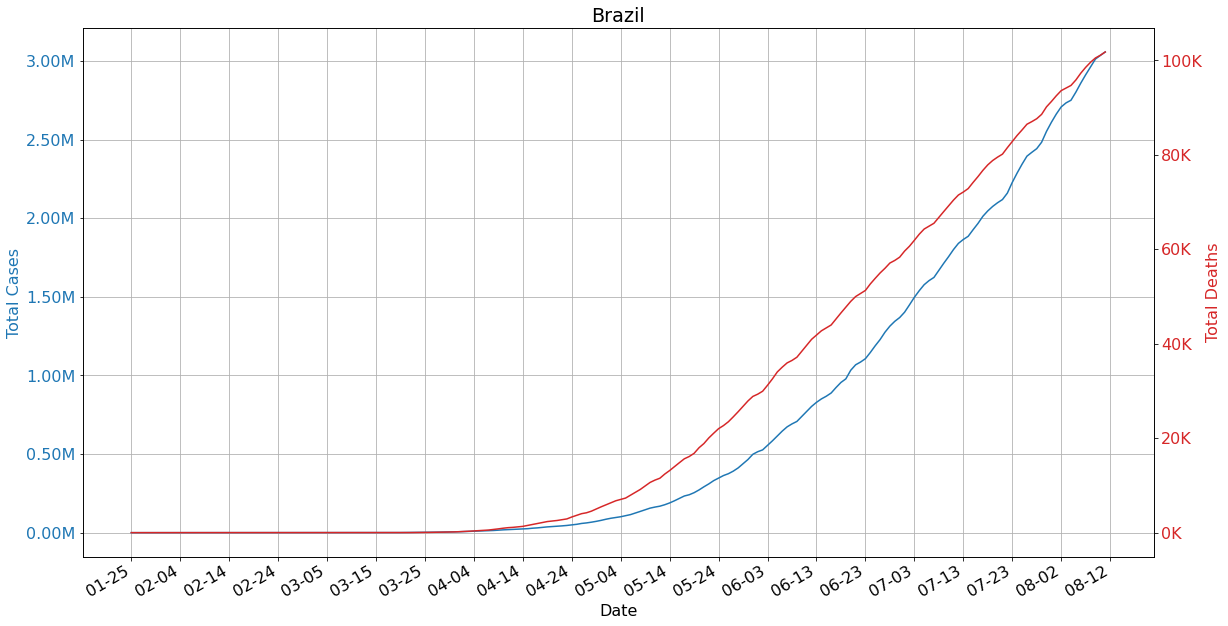

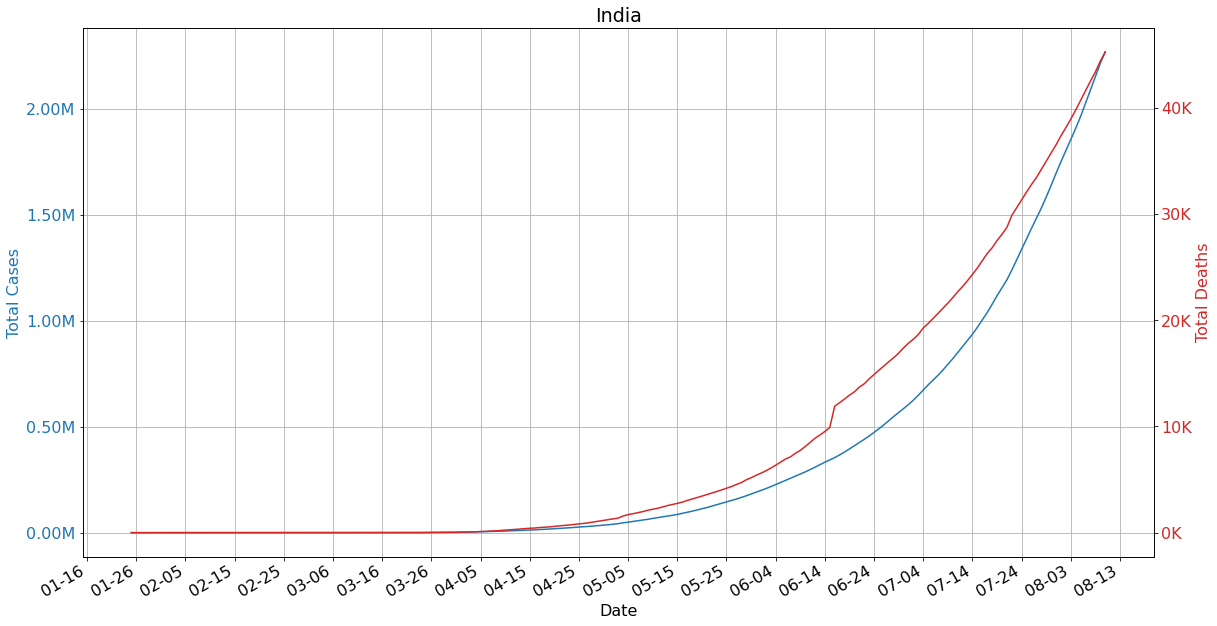

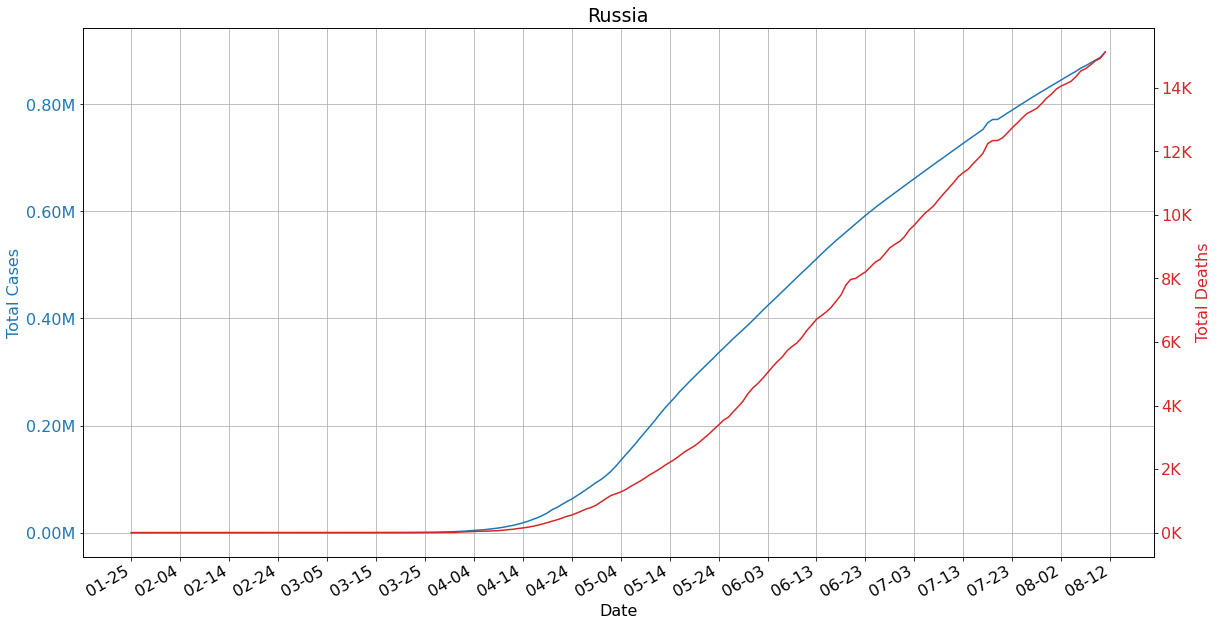

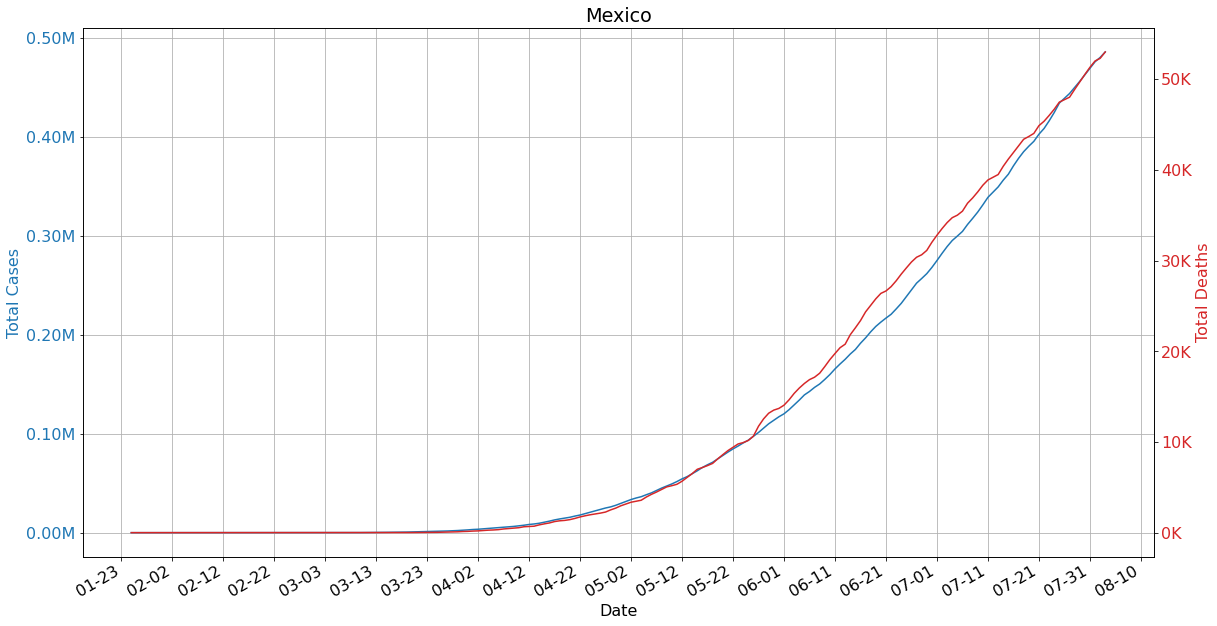

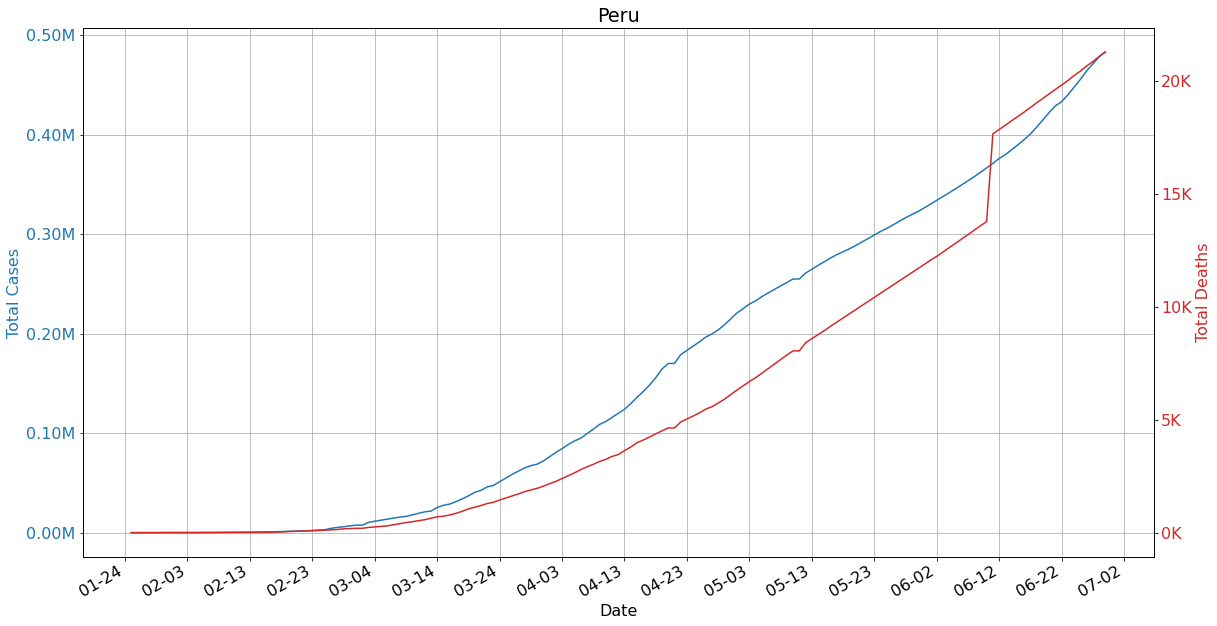

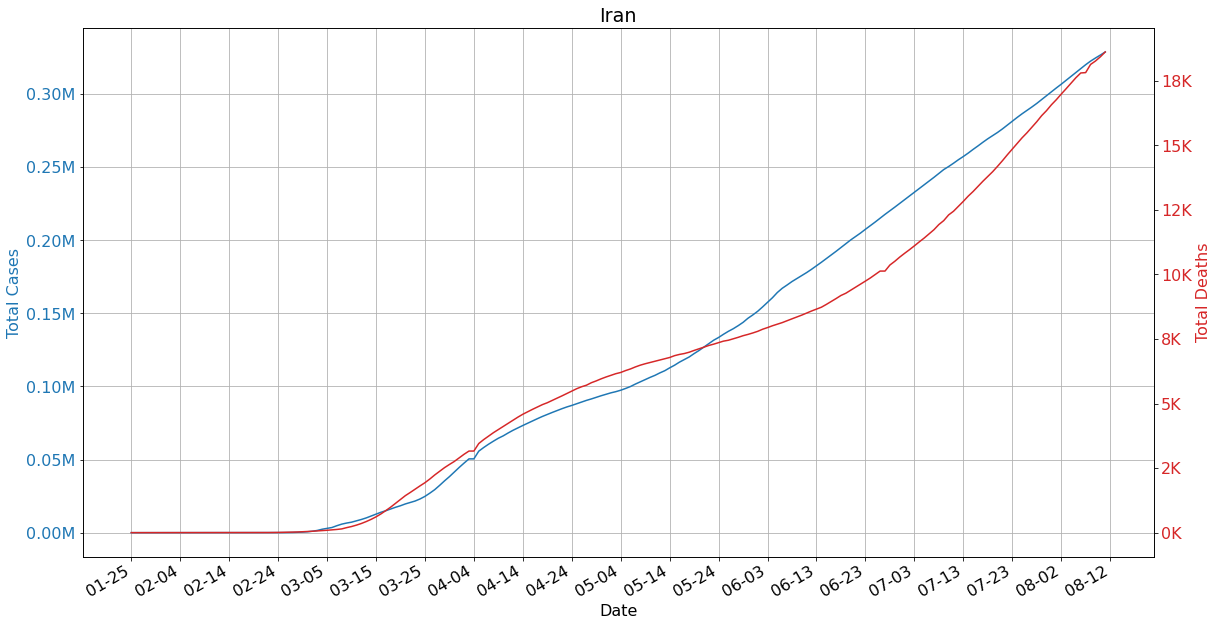

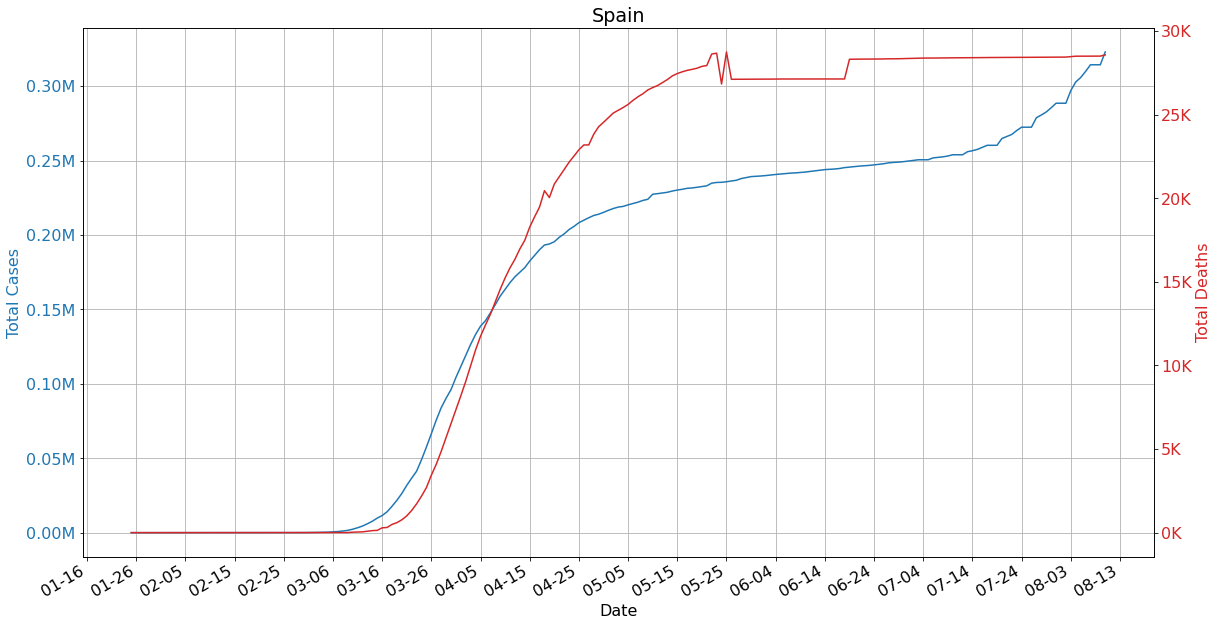

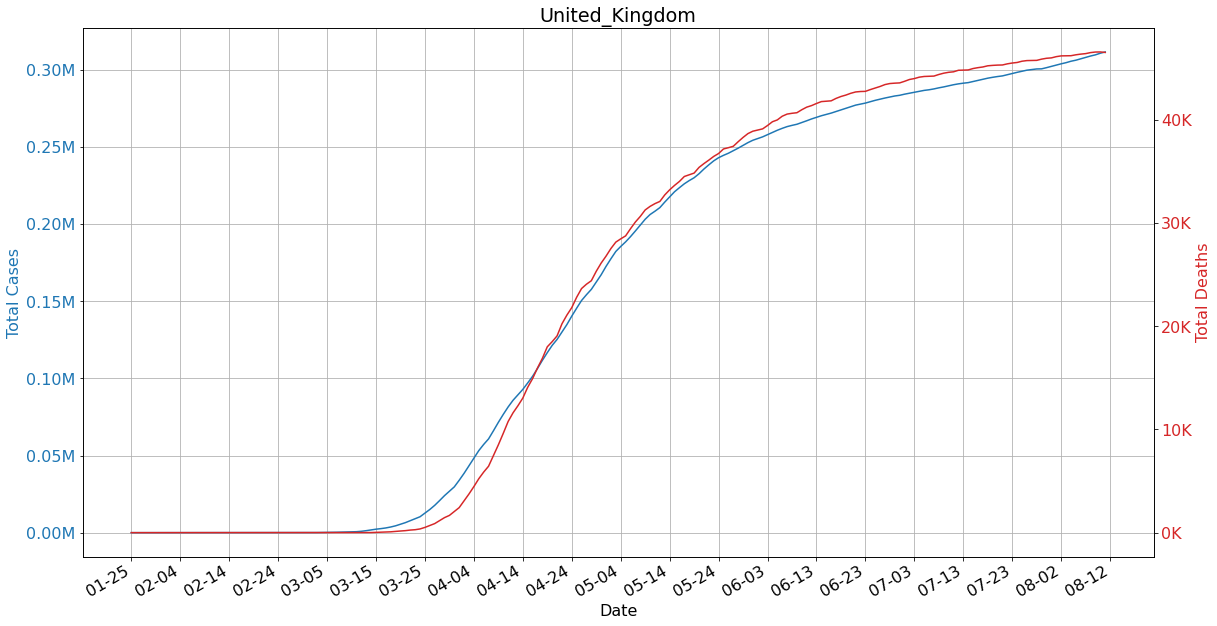

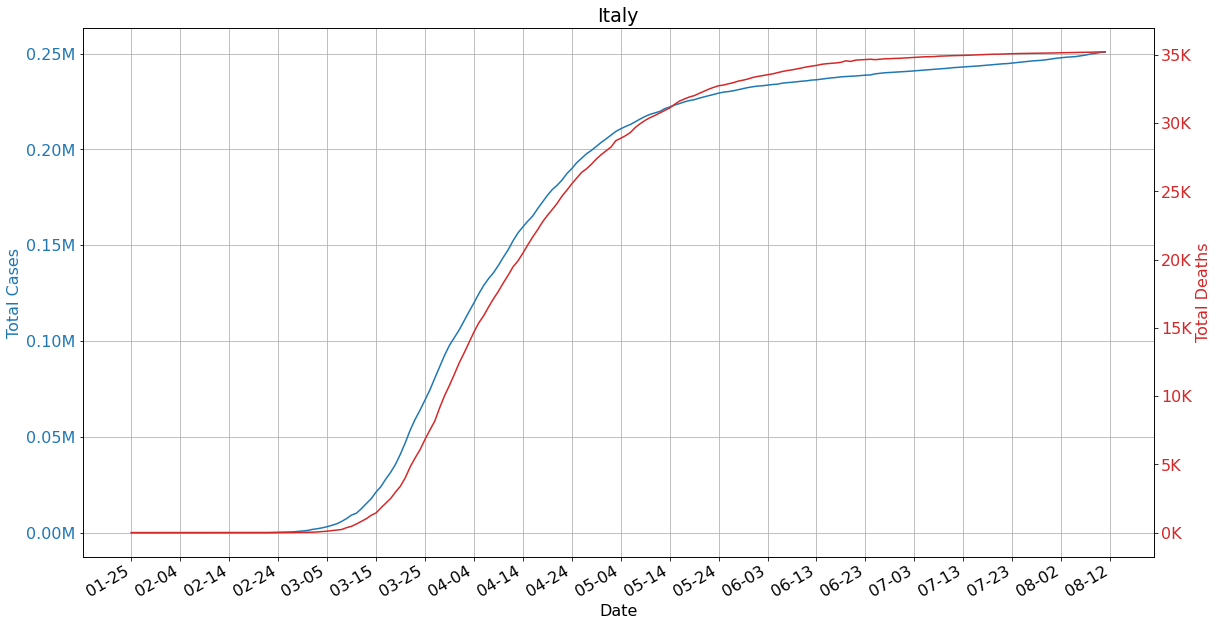

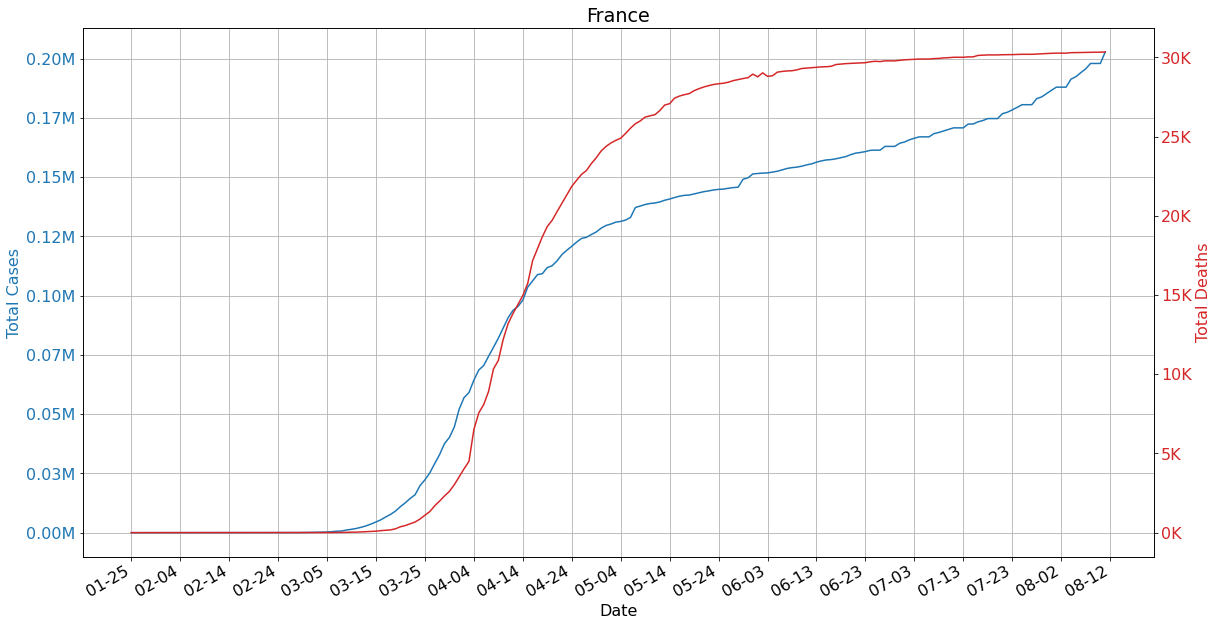

In [30]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfTotalCases.date, dfTotalCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfTotalDeaths.date, dfTotalDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()


## <ins>Daily Cases</ins> in the most affected countries

In [31]:
dfNewCases.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India     Russia  Mexico   Peru  \
0   2020-01-25         0.0000     0.0000     0.0000     0.0000  0.0000 1.0000   
1   2020-01-26         1.0000     0.0000     0.0000     0.0000  0.0000 6.0000   
2   2020-01-27         3.0000     0.0000     0.0000     0.0000  0.0000 2.0000   
3   2020-01-28         0.0000     0.0000     0.0000     0.0000  0.0000 2.0000   
4   2020-01-29         0.0000     0.0000     0.0000     0.0000  0.0000 6.0000   
..         ...            ...        ...        ...        ...     ...    ...   
195 2020-08-07     59755.0000 53139.0000 61537.0000  4551.0000     nan    nan   
196 2020-08-08     58150.0000 50230.0000 64399.0000  5241.0000     nan    nan   
197 2020-08-09     56221.0000 49970.0000 62064.0000  5212.0000     nan    nan   
198 2020-08-10     46847.0000 23010.0000 53601.0000  5189.0000     nan    nan   
199 2020-08-11     49530.0000 22048.0000        nan 10063.0000     nan    nan   

         Iran     Spain  United_Kingdom    Italy    France  
0      0.0000    0.0000          0.0000   0.0000    0.0000  
1      0.0000    0.0000          0.0000   0.0000    0.0000  
2      0.0000    0.0000          0.0000   0.0000    0.0000  
3      0.0000    0.0000          0.0000   0.0000    3.0000  
4      0.0000    0.0000          0.0000   0.0000    1.0000  
..        ...       ...             ...      ...       ...  
195 2634.0000    0.0000        950.0000 401.0000 1604.0000  
196 2450.0000    0.0000        871.0000 552.0000 2288.0000  
197 2125.0000 4507.0000        758.0000 347.0000    0.0000  
198 2020.0000 8618.0000       1062.0000 463.0000    0.0000  
199 2132.0000       nan        816.0000 259.0000 4854.0000  

[200 rows x 12 columns]

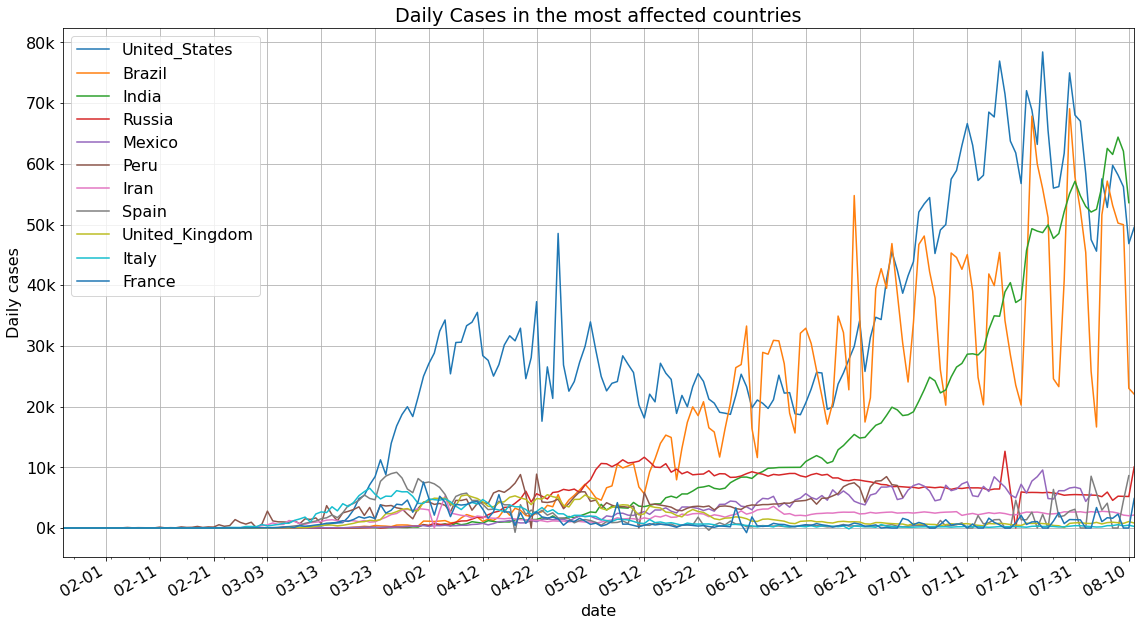

In [32]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily cases')
plt.title('Daily Cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [33]:
toGo = dfNewCases.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

In [34]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='Daily cases in the most affected countries')

figTest.show()

## <ins>Daily Deaths</ins> in the most affected countries

In [35]:
dfNewDeaths.sort_values(by=['date'], ascending=True)

date  United_States    Brazil     India   Russia  Mexico   Peru  \
0   2020-01-25         0.0000    0.0000    0.0000   0.0000  0.0000 0.0000   
1   2020-01-26         0.0000    0.0000    0.0000   0.0000  0.0000 0.0000   
2   2020-01-27         0.0000    0.0000    0.0000   0.0000  0.0000 0.0000   
3   2020-01-28         0.0000    0.0000    0.0000   0.0000  0.0000 0.0000   
4   2020-01-29         0.0000    0.0000    0.0000   0.0000  0.0000 0.0000   
..         ...            ...       ...       ...      ...     ...    ...   
195 2020-08-07      1848.0000 1237.0000  933.0000  74.0000     nan    nan   
196 2020-08-08      1252.0000 1079.0000  861.0000 119.0000     nan    nan   
197 2020-08-09      1069.0000  905.0000 1007.0000 129.0000     nan    nan   
198 2020-08-10       513.0000  572.0000  871.0000  77.0000     nan    nan   
199 2020-08-11       523.0000  703.0000       nan 200.0000     nan    nan   

        Iran   Spain  United_Kingdom   Italy  France  
0     0.0000  0.0000          0.0000  0.0000  0.0000  
1     0.0000  0.0000          0.0000  0.0000  0.0000  
2     0.0000  0.0000          0.0000  0.0000  0.0000  
3     0.0000  0.0000          0.0000  0.0000  0.0000  
4     0.0000  0.0000          0.0000  0.0000  0.0000  
..       ...     ...             ...     ...     ...  
195  14.0000  0.0000         49.0000  6.0000  7.0000  
196 316.0000  0.0000         98.0000  3.0000 12.0000  
197 132.0000  3.0000         55.0000 13.0000  0.0000  
198 163.0000 73.0000          8.0000  2.0000  0.0000  
199 189.0000     nan        -48.0000  4.0000 16.0000  

[200 rows x 12 columns]

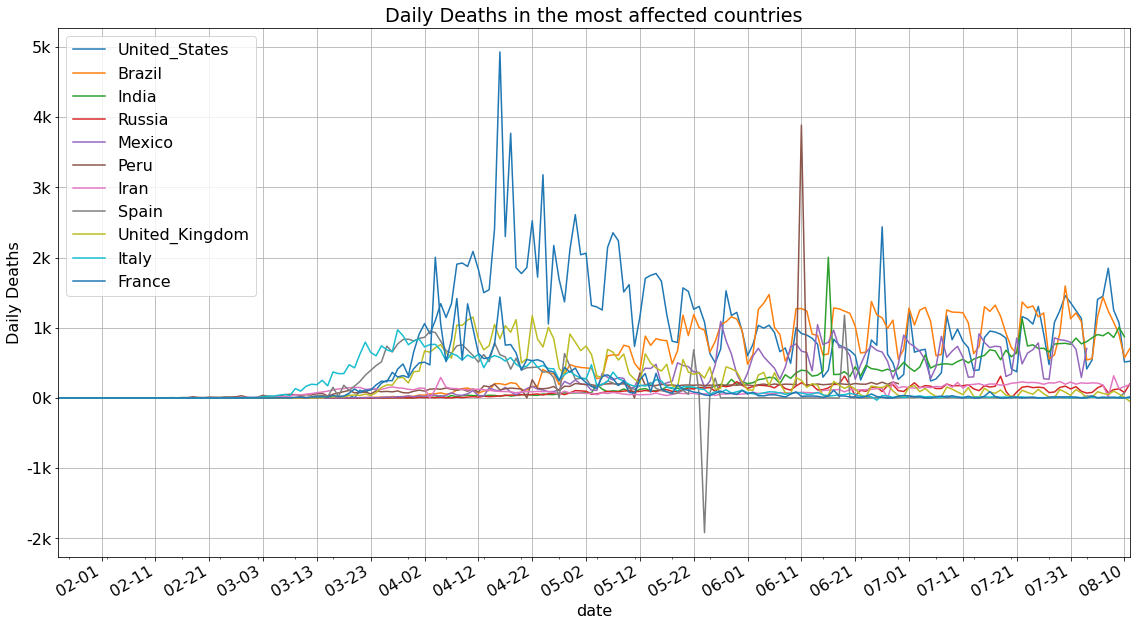

In [36]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily Deaths')
plt.title('Daily Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Daily cases and deaths by country

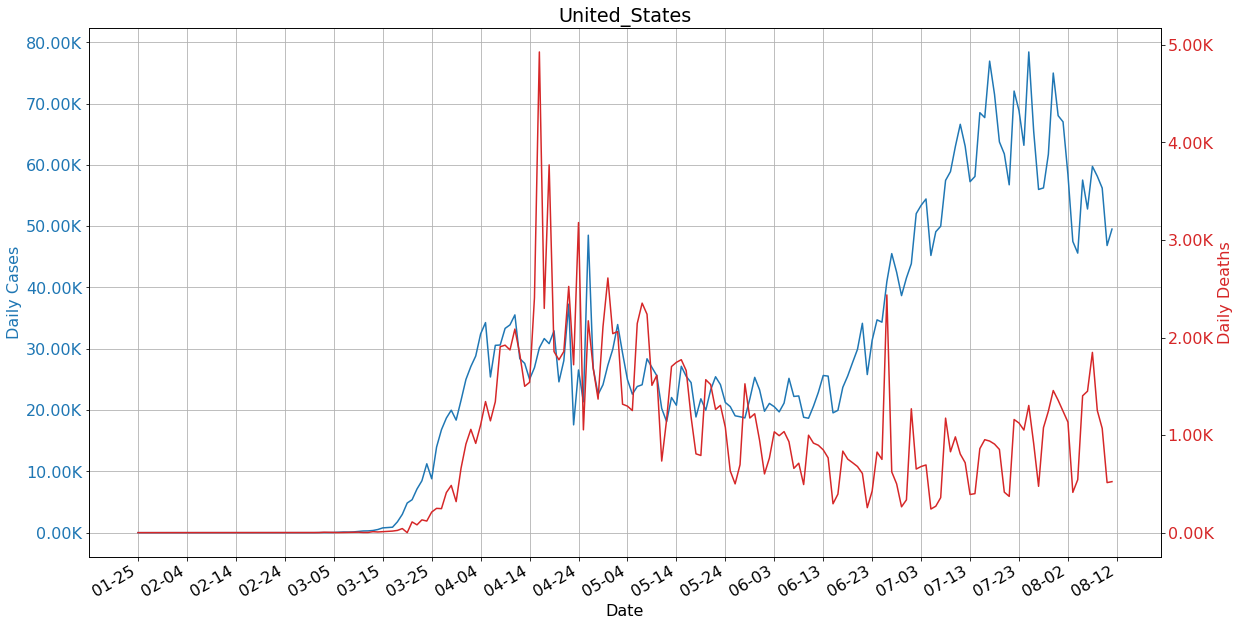

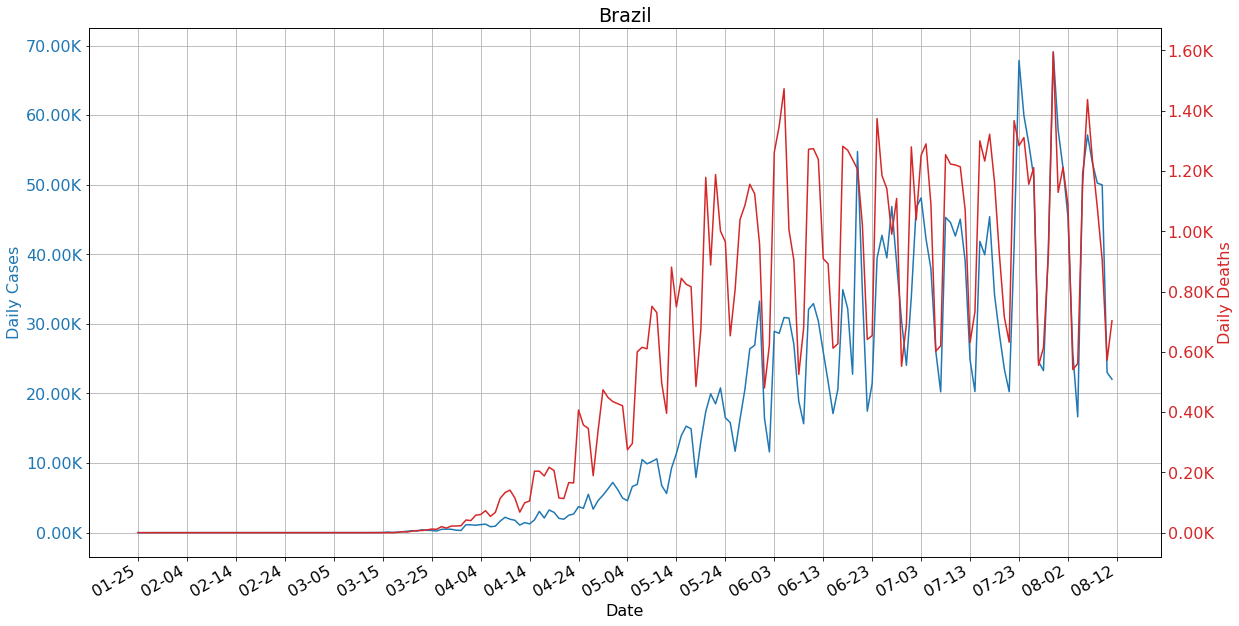

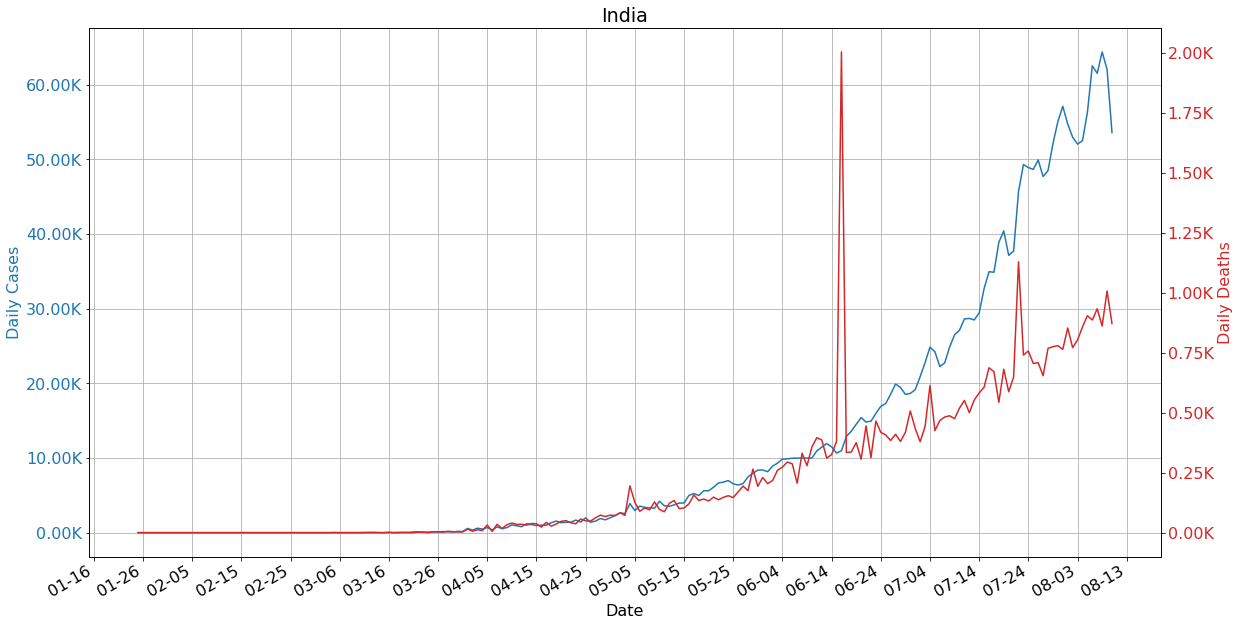

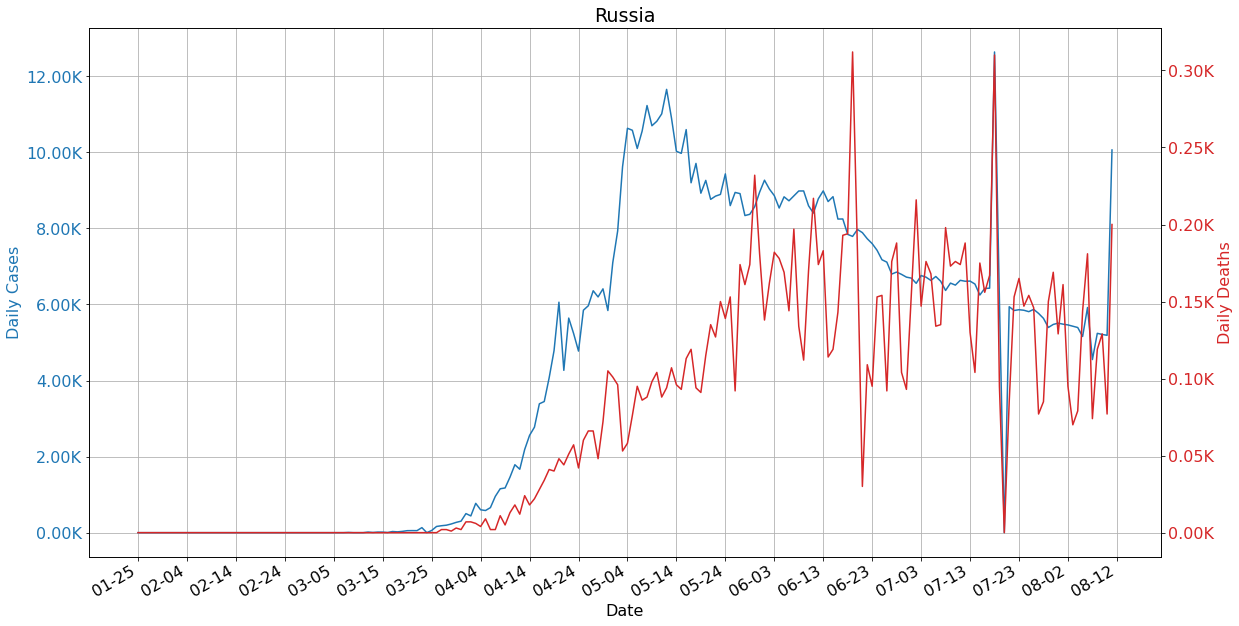

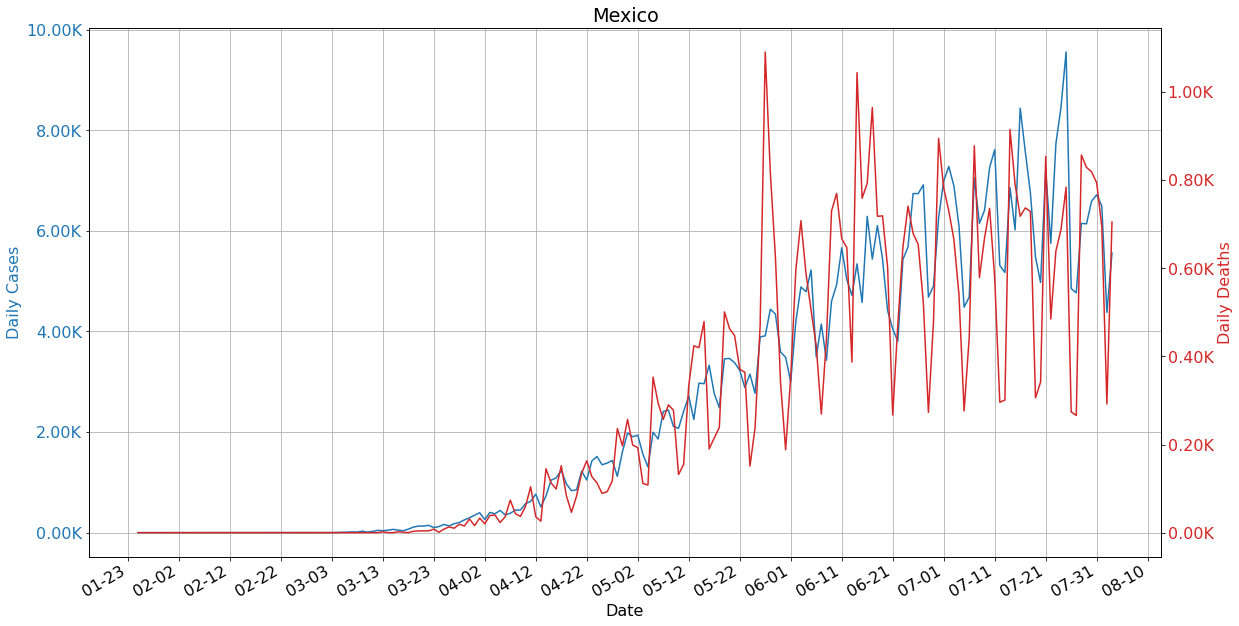

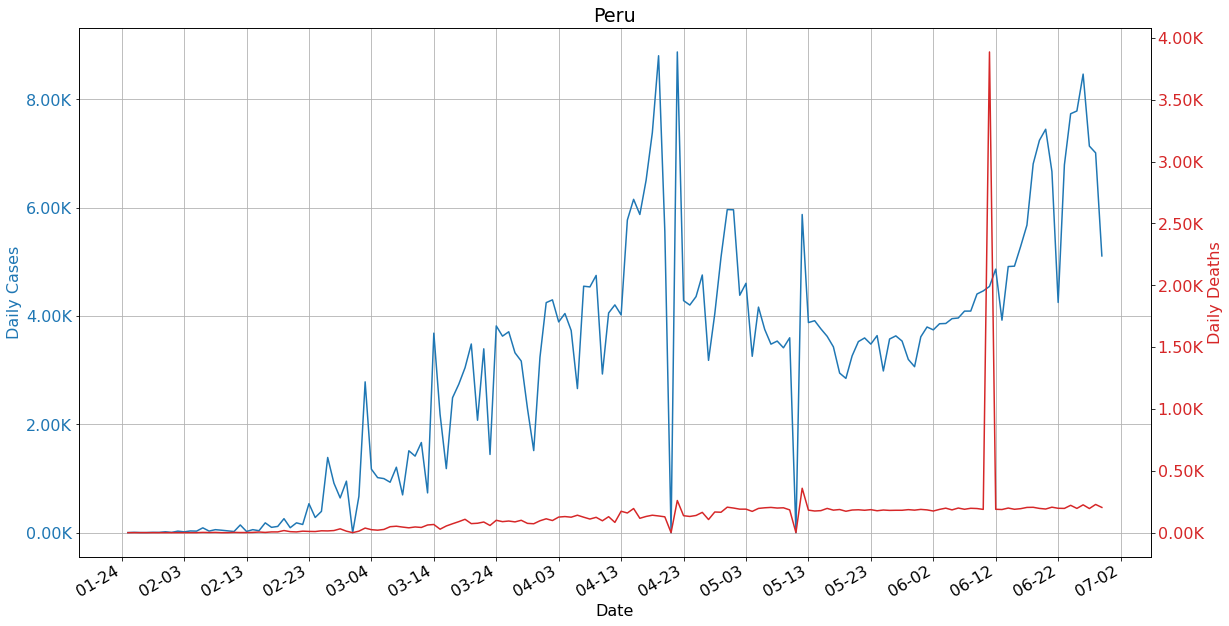

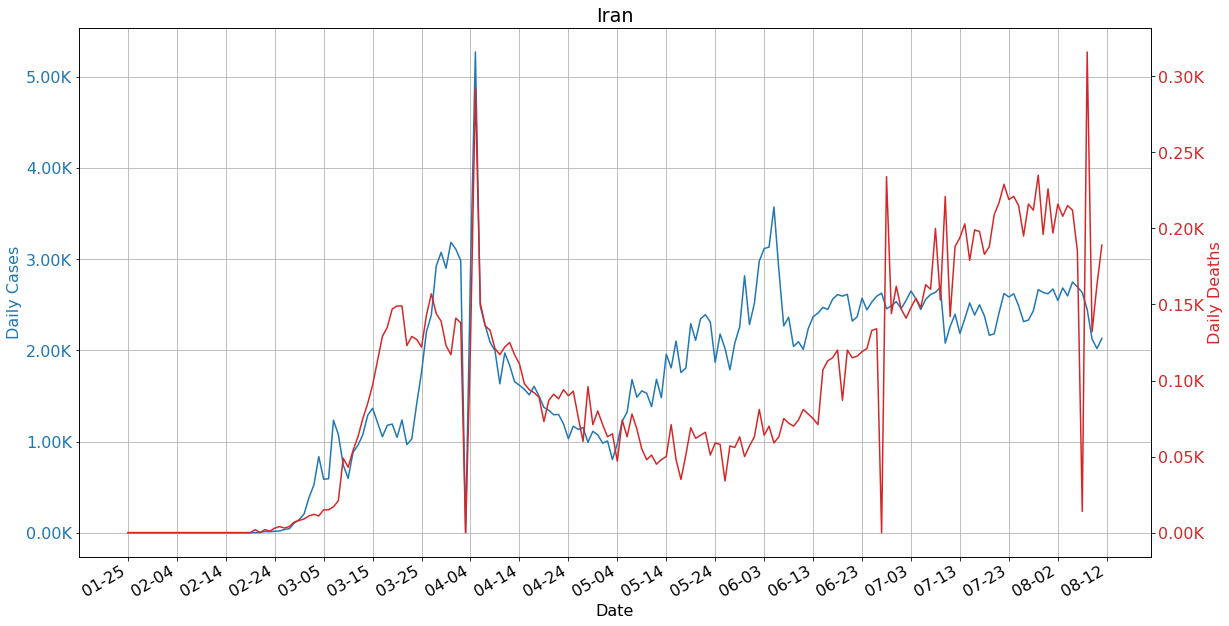

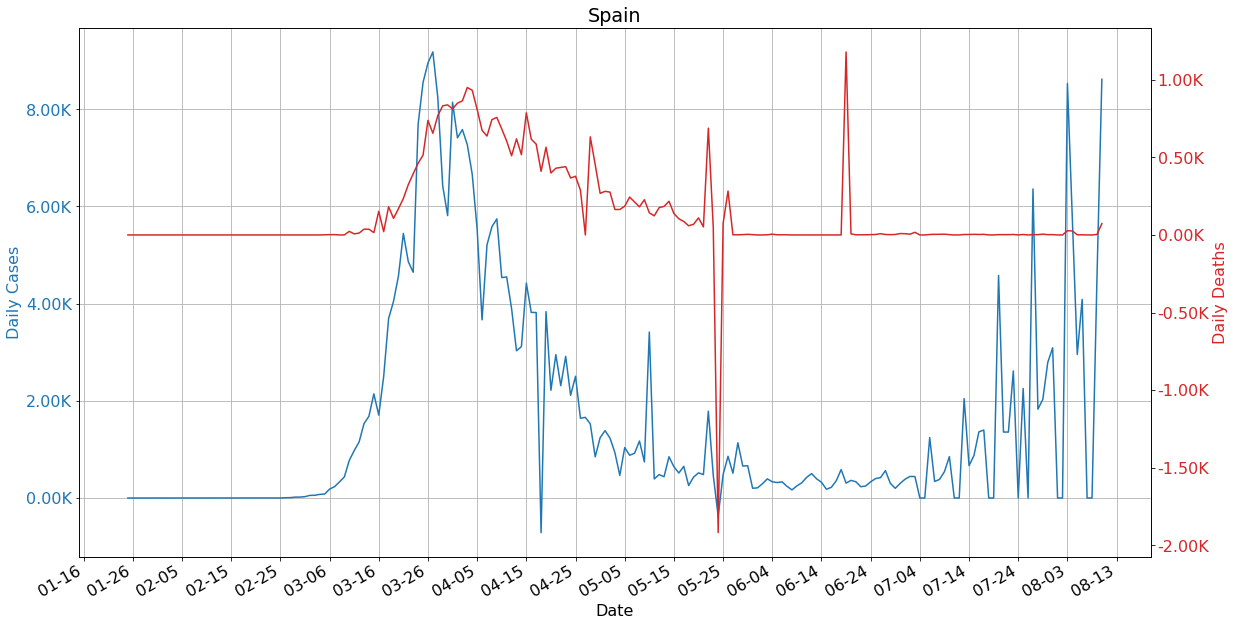

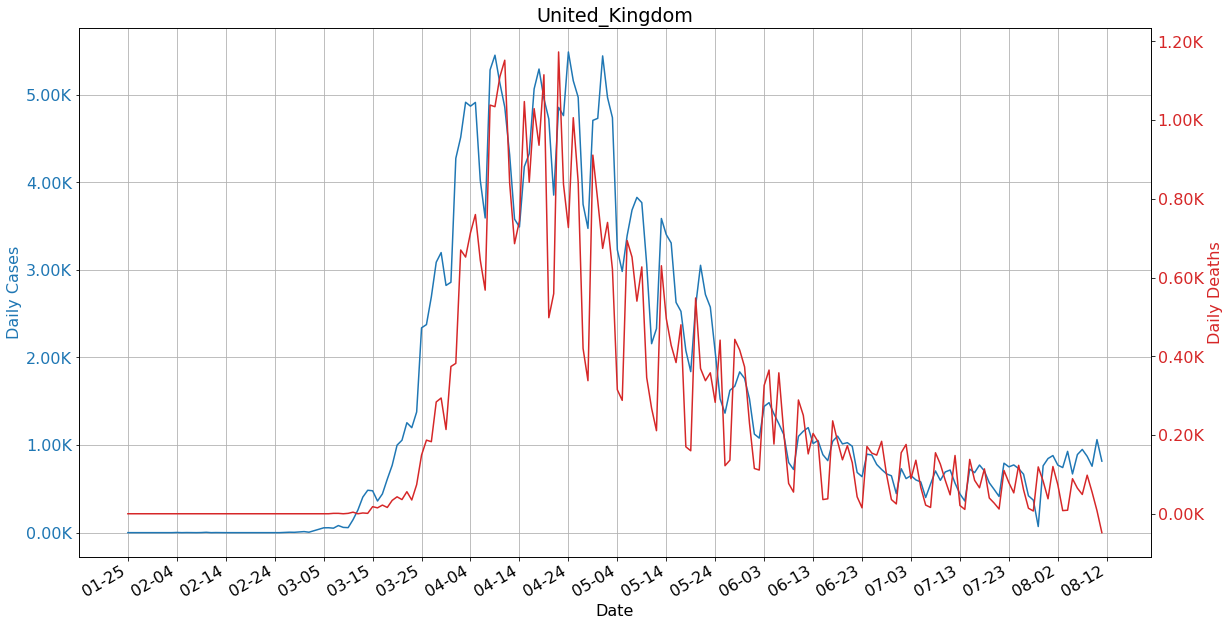

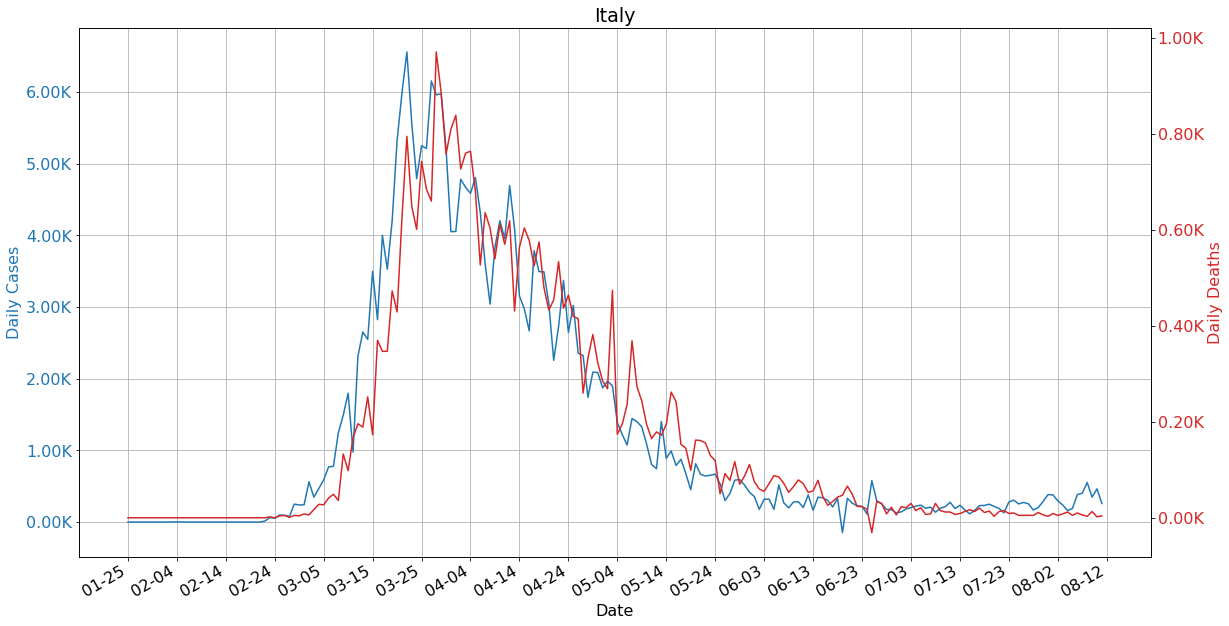

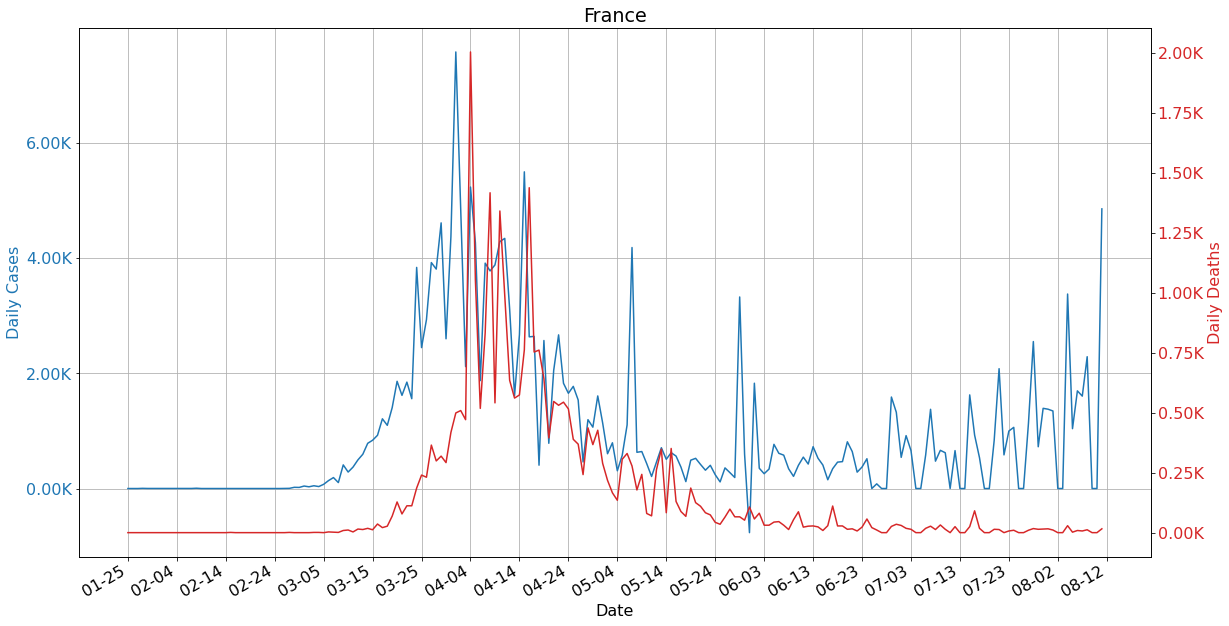

In [37]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfNewCases.date, dfNewCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfNewDeaths.date, dfNewDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()

## <span style="color:green">Brazil Cases</span>

### source: https://data.brasil.io/dataset/covid19/_meta/list.html

In [38]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

city  city_ibge_code       date  epidemiological_week  \
0          São Paulo    3550308.0000 2020-02-25                     9   
2          São Paulo    3550308.0000 2020-02-26                     9   
4          São Paulo    3550308.0000 2020-02-27                     9   
6          São Paulo    3550308.0000 2020-02-28                     9   
8          São Paulo    3550308.0000 2020-02-29                     9   
...              ...             ...        ...                   ...   
515494    Tocantínia    1721109.0000 2020-08-10                    33   
515495      Tupirama    1721257.0000 2020-08-10                    33   
515496    Tupiratins    1721307.0000 2020-08-10                    33   
515497  Wanderlândia    1722081.0000 2020-08-10                    33   
515498       Xambioá    1722107.0000 2020-08-10                    33   

        estimated_population_2019  is_last  is_repeated  \
0                   12252023.0000    False        False   
2                   12252023.0000    False        False   
4                   12252023.0000    False        False   
6                   12252023.0000    False        False   
8                   12252023.0000    False        False   
...                           ...      ...          ...   
515494                  7545.0000    False         True   
515495                  1891.0000    False         True   
515496                  2671.0000    False         True   
515497                 11683.0000    False         True   
515498                 11540.0000    False         True   

        last_available_confirmed  \
0                              1   
2                              1   
4                              1   
6                              2   
8                              2   
...                          ...   
515494                       256   
515495                        23   
515496                         6   
515497                       182   
515498                       597   

        last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.0082          2020-02-25   
2                                              0.0082          2020-02-26   
4                                              0.0082          2020-02-27   
6                                              0.0163          2020-02-28   
8                                              0.0163          2020-02-29   
...                                               ...                 ...   
515494                                      3392.9755          2020-08-08   
515495                                      1216.2877          2020-08-08   
515496                                       224.6350          2020-08-08   
515497                                      1557.8191          2020-08-08   
515498                                      5173.3102          2020-08-08   

        last_available_death_rate  last_available_deaths  order_for_place  \
0                          0.0000                      0                1   
2                          0.0000                      0                2   
4                          0.0000                      0                3   
6                          0.0000                      0                4   
8                          0.0000                      0                5   
...                           ...                    ...              ...   
515494                     0.0156                      4               84   
515495                     0.0435                      1               80   
515496                     0.0000                      0               80   
515497                     0.0275                      5              105   
515498                     0.0134                      8               94   

       place_type state  new_confirmed  new_deaths  
0            city    SP              1           0  
2            city    SP              0   

In [39]:
cities = set(df.loc[:, 'city'].values)

In [40]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [41]:
print(pd.to_datetime("today") - pd.to_timedelta('4days'))

2020-08-07 22:31:51.064094


In [42]:
least_recent_date = df['date'].min()
least_recent_date

Timestamp('2020-02-25 00:00:00')

In [43]:
recent_date = df['date'].max()
recent_date

Timestamp('2020-08-10 00:00:00')

In [44]:
(recent_date - pd.to_timedelta('1days'))

Timestamp('2020-08-09 00:00:00')

In [45]:
dfSelect = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
dfToday = dfSelect[dfSelect['date'] > (recent_date - pd.to_timedelta('1days'))]
dfToday

date state          city  new_confirmed  new_deaths
509978 2020-08-10    AC    Acrelândia              0           0
509979 2020-08-10    AC  Assis Brasil              0           0
509980 2020-08-10    AC     Brasiléia              0           0
509981 2020-08-10    AC        Bujari              0           0
509982 2020-08-10    AC      Capixaba              0           0
...           ...   ...           ...            ...         ...
515494 2020-08-10    TO    Tocantínia              0           0
515495 2020-08-10    TO      Tupirama              0           0
515496 2020-08-10    TO    Tupiratins              0           0
515497 2020-08-10    TO  Wanderlândia              0           0
515498 2020-08-10    TO       Xambioá              0           0

[5486 rows x 5 columns]

In [46]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [47]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

state  new_confirmed  new_deaths
0  Other_States        1382022       37340
1            SP         598609       24447
2            BA         190705        3987
3            CE         187207        7992
4            RJ         180025       14109
5            PA         169618        5900
6            MG         154641        3556
7            MA         130576        3187

## Cases in Brazil cities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe43ca438d0>,
      dtype=object)

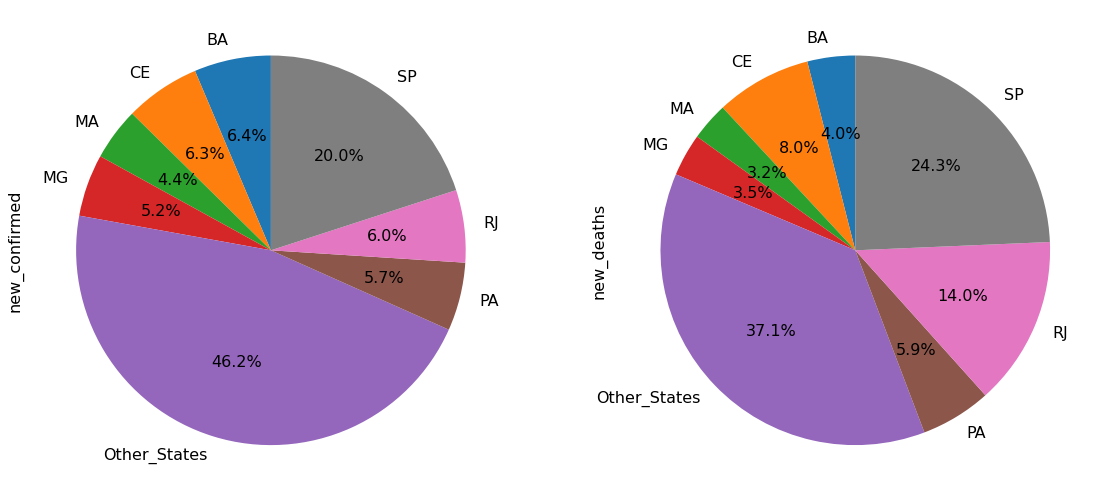

In [48]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [49]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

Empty DataFrame
Columns: [date, state, city, new_confirmed, new_deaths]
Index: []

In [50]:
today = (pd.to_datetime("today") - pd.to_timedelta('2days')).date()
today

datetime.date(2020, 8, 9)

In [54]:
# dfSP.plot.barh(x='city', y=['new_confirmed','new_deaths'], figsize=(19.20,10.80))
# plt.title('Daily cases and deaths in SP - '+str(today))
# plt.grid()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [55]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0    2020-2-13    255.0000
1     2020-3-9    228.0000
2    2020-3-10    208.0000
3    2020-3-11    273.0000
4    2020-3-12    326.0000
..         ...         ...
152   2020-8-7   6911.0000
153   2020-8-8   6549.0000
154   2020-8-9   5670.0000
155  2020-8-10   4488.0000
156  2020-8-11   5042.0000

[157 rows x 2 columns]

In [56]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [57]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [58]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

117 40


In [59]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [60]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [61]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [62]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [63]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
12/12 [==============================] - 1s 86ms/step - loss: 0.1836 - mse: 0.1836 - val_loss: 0.1545 - val_mse: 0.1545
Epoch 2/50
12/12 [==============================] - 0s 12ms/step - loss: 0.1348 - mse: 0.1348 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 3/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0930 - mse: 0.0930 - val_loss: 0.0726 - val_mse: 0.0726
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0368 - mse: 0.0368 - val_loss: 0.0232 - val_mse: 0.0232
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0254 - mse: 0.0254 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 8/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0214 - m

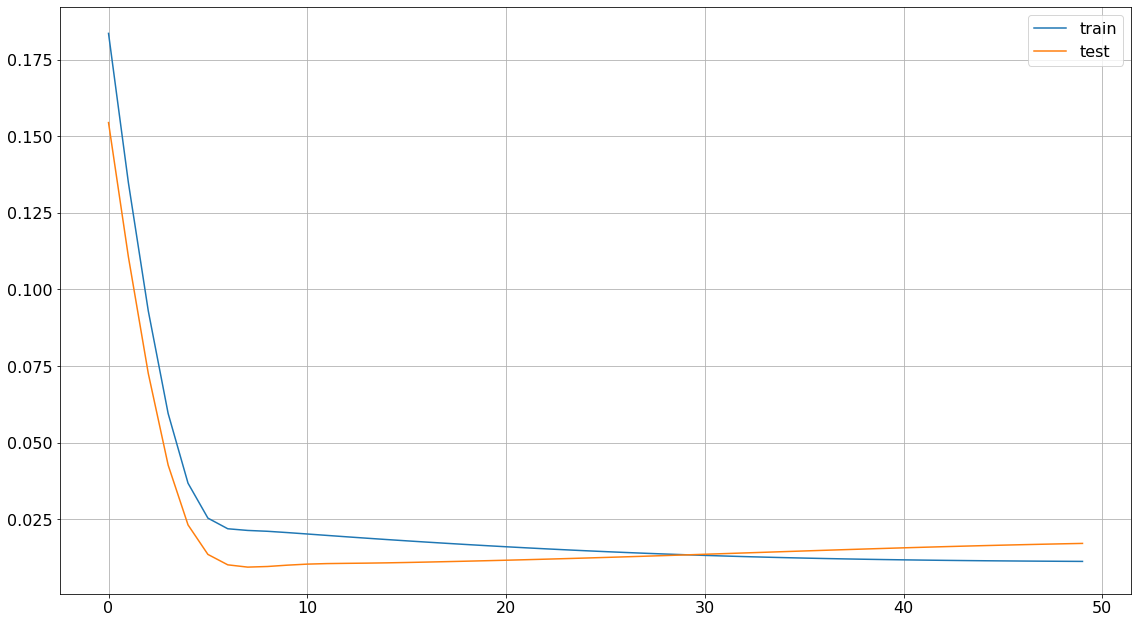

In [64]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [65]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [66]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [67]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1091.08 RMSE
Test Score: 1234.66 RMSE


In [68]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [69]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

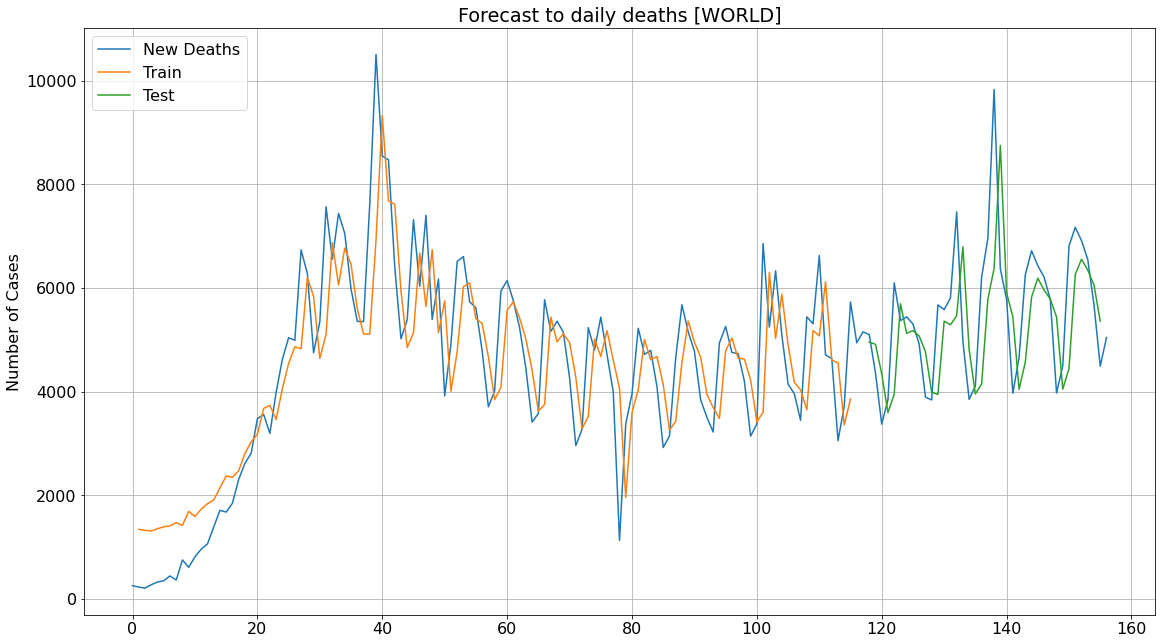

In [70]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

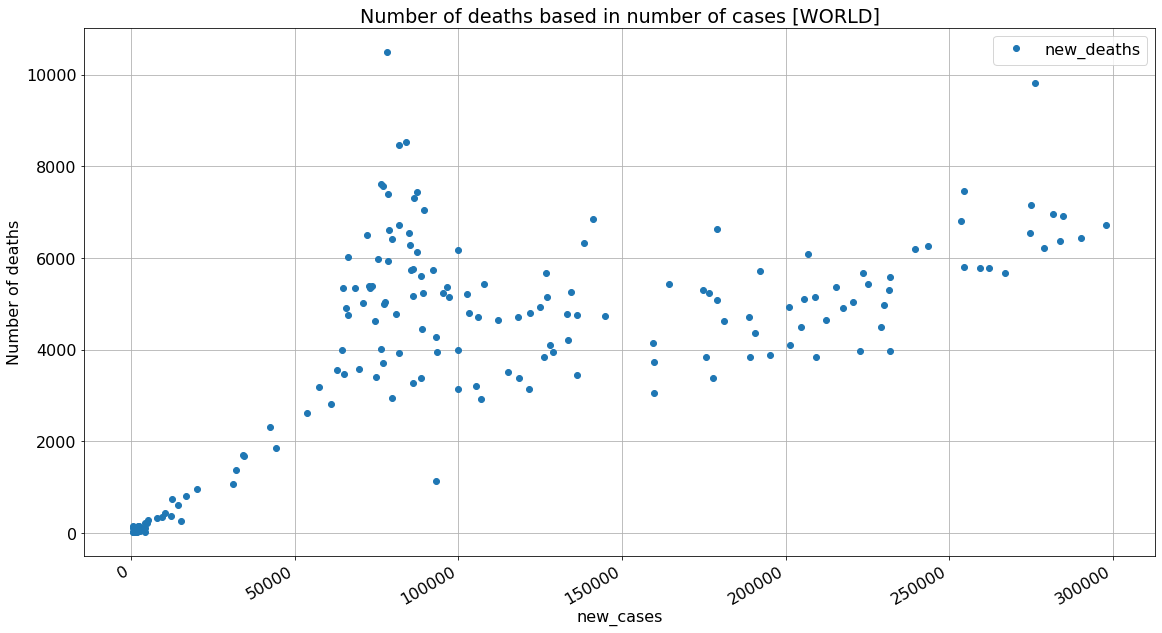

In [71]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

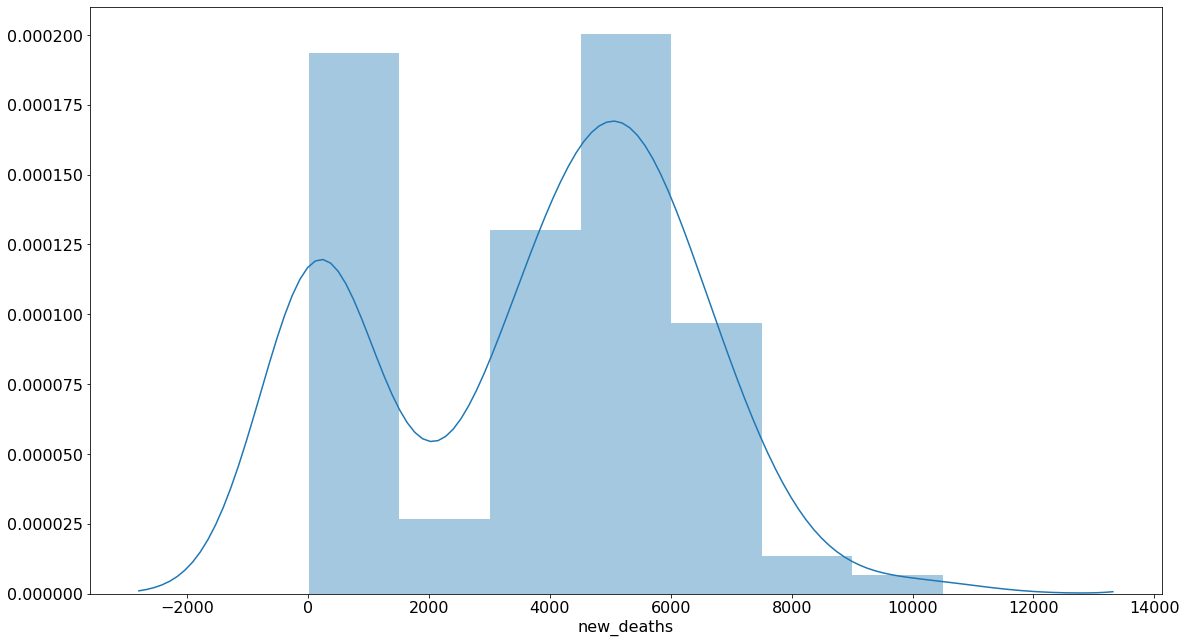

In [72]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [73]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [75]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [76]:
print(regressor.intercept_)

[13644.20103941]


In [77]:
print(regressor.coef_)

[[24.08940736]]


In [78]:
y_pred = regressor.predict(X_test)

In [79]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0    2072.0000  15980.8736
1  195393.0000 107424.2639
2   74816.0000  95789.0801
3   88563.0000 148858.0445
4  209334.0000 106364.3300
..         ...         ...
75  66304.0000 158927.4168
76  86057.0000 152688.2603
77   3442.0000  15715.8901
78    996.0000  16510.8405
79 133627.0000 114867.8908

[80 rows x 2 columns]

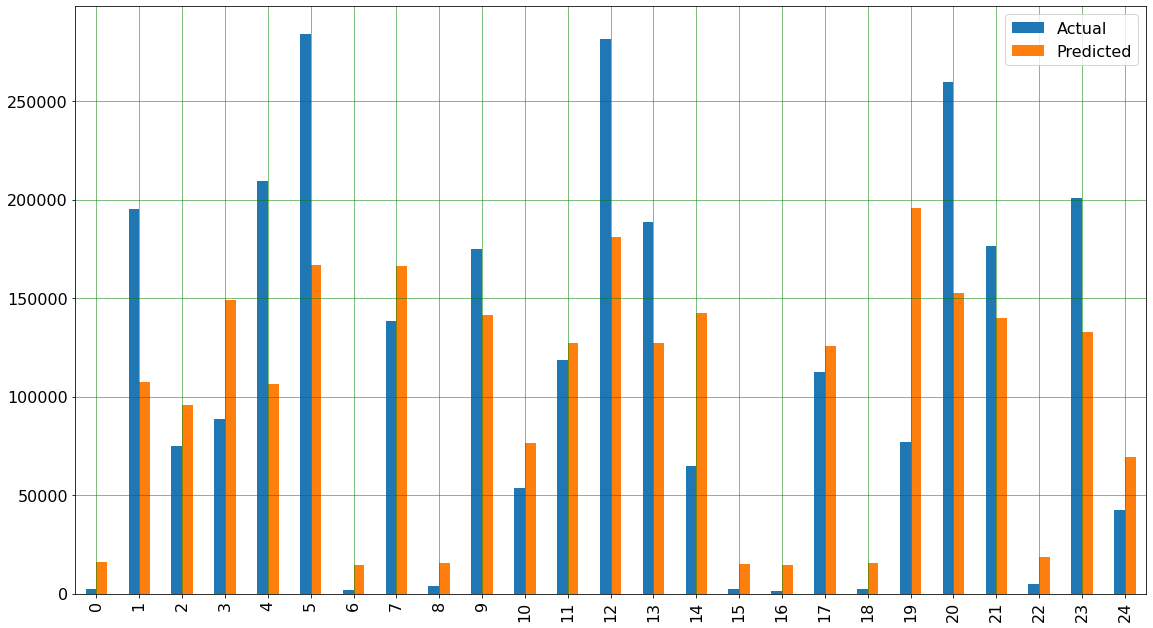

In [80]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

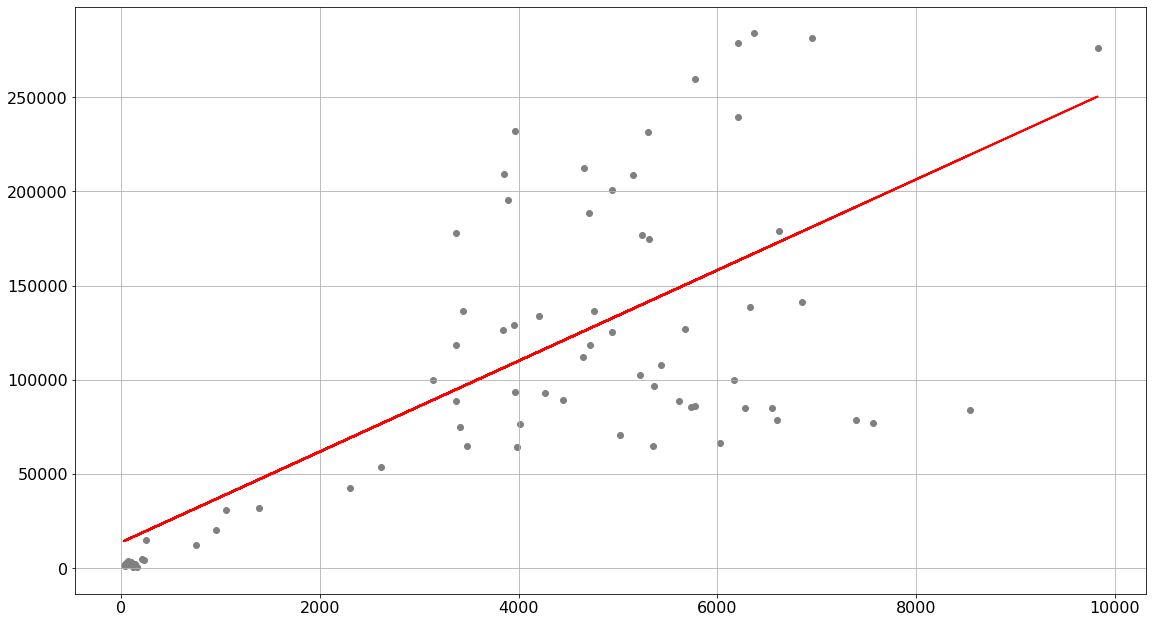

In [81]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 43234.071617075126
Mean Squared Error: 3168953730.3669324
Root Mean Squared Error: 3168953730.3669324


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [85]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

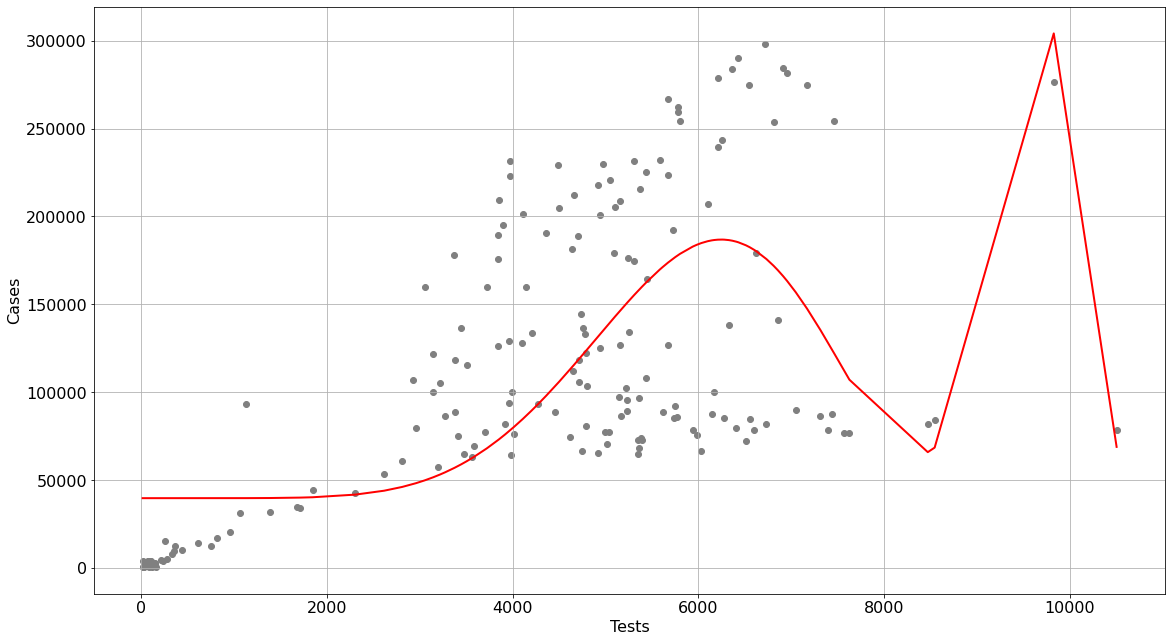

In [86]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()